In [1]:
import re
import gensim
import logging
import nltk.data
import pandas as pd
from nltk.corpus import stopwords
from gensim.models import word2vec

#import warnings
#warnings.filterwarnings('ignore')

In [2]:
import numpy as np

In [3]:
import wget
import zipfile

In [4]:
from sklearn.decomposition import TruncatedSVD

In [5]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [10]:
#model_url = 'http://vectors.nlpl.eu/repository/11/180.zip'
#model_url = 'https://rusvectores.org/static/models/rusvectores4/news/news_upos_cbow_600_2_2018.vec.gz'
#m = wget.download(model_url)
#model_file = model_url.split('/')[-1]
#model_file = '180.zip'
#with zipfile.ZipFile(model_file, 'r') as archive:
#    stream = archive.open('model.bin')
#    model = gensim.models.KeyedVectors.load_word2vec_format(stream, binary=True)

model_file = 'test1.model'
model = gensim.models.Word2Vec.load(model_file)

2022-03-04 12:02:58,941 : INFO : loading Word2Vec object from test1.model
2022-03-04 12:03:01,688 : INFO : loading wv recursively from test1.model.wv.* with mmap=None
2022-03-04 12:03:01,691 : INFO : loading vectors from test1.model.wv.vectors.npy with mmap=None
2022-03-04 12:03:06,638 : INFO : loading syn1neg from test1.model.syn1neg.npy with mmap=None
2022-03-04 12:03:11,311 : INFO : setting ignored attribute cum_table to None
2022-03-04 12:04:26,606 : INFO : Word2Vec lifecycle event {'fname': 'test1.model', 'datetime': '2022-03-04T12:04:26.605712', 'gensim': '4.1.2', 'python': '3.8.12 (default, Oct 12 2021, 03:01:40) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19043-SP0', 'event': 'loaded'}


In [11]:
from tqdm import tqdm

In [12]:
import random

In [31]:
len(model.wv.index_to_key)

727138

In [19]:
model.wv.vocab

AttributeError: The vocab attribute was removed from KeyedVector in Gensim 4.0.0.
Use KeyedVector's .key_to_index dict, .index_to_key list, and methods .get_vecattr(key, attr) and .set_vecattr(key, attr, new_val) instead.
See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4

In [25]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

morph.parse('слово')[0].tag.POS

2022-03-04 12:13:09,032 : INFO : Loading dictionaries from C:\Users\veron\Anaconda3\envs\main\lib\site-packages\pymorphy2_dicts_ru\data
2022-03-04 12:13:09,243 : INFO : format: 2.4, revision: 417127, updated: 2020-10-11T15:05:51.070345


'NOUN'

In [28]:
all_nouns = []
for w in tqdm(model.wv.index_to_key):
    #print(w)
    if len(w) > 1 and morph.parse(w)[0].tag.POS == 'NOUN':
    #if w.split('_')[-1] == 'NOUN':
        all_nouns.append(w)

100%|████████████████████████████████████████████████████████████████████████| 727138/727138 [09:07<00:00, 1327.31it/s]


In [30]:
all_nouns

['система',
 'время',
 'мочь',
 'образ',
 'работа',
 'год',
 'человек',
 'рис',
 'процесс',
 'модель',
 'жизнь',
 'текст',
 'данных',
 'значение',
 'литература',
 'мир',
 'часть',
 'автор',
 'слово',
 'результат',
 'герой',
 'метод',
 'анализ',
 'порода',
 'исследование',
 'произведение',
 'структура',
 'задача',
 'объект',
 'роман',
 'вид',
 'тип',
 'элемент',
 'язык',
 'случай',
 'использование',
 'уровень',
 'зона',
 'связь',
 'основа',
 'вода',
 'форма',
 'месторождение',
 'наука',
 'условие',
 'решение',
 'информация',
 'состояние',
 'проблема',
 'область',
 'отношение',
 'состав',
 'возможность',
 'история',
 'развитие',
 'качество',
 'писатель',
 'функция',
 'управление',
 'число',
 'материал',
 'статья',
 'содержание',
 'параметр',
 'сеть',
 'изменение',
 'поэт',
 'количество',
 'место',
 'точка',
 'россия',
 'творчество',
 'алгоритм',
 'разработка',
 'оценка',
 'вопрос',
 'комплекс',
 'технология',
 'отложение',
 'особенность',
 'программа',
 'имя',
 'книга',
 'культура',
 'на

In [29]:
len(all_nouns)

271141

In [11]:
#our_nouns = [random.choice(all_nouns) for i in range(1000)]

In [32]:
def get_matrix(all_nouns):
    vectors_of_words = np.zeros((len(all_nouns), model.vector_size))
    for i, word in enumerate(all/_nouns):
        vectors_of_words[i] = model[word]
        
    return vectors_of_words

In [33]:
def lsa_matrix(vectors_of_words, n_components, n_iter=100):
    lsa_obj = TruncatedSVD(n_components=n_components, n_iter=n_iter, random_state=42)
    lsa_data = lsa_obj.fit_transform(vectors_of_words)
    return lsa_data
#Sigma = lsa_obj.singular_values_
#V_T = lsa_obj.components_.T

In [34]:
def sort_results(lsa_data, all_nouns):    
    sorted_scores_indx = np.argsort(lsa_data, axis=0)[::-1]
    result = np.array(all_nouns)[sorted_scores_indx.ravel()]
    result_nums = np.array(lsa_data)[sorted_scores_indx.ravel()]
    return result, result_nums

def sort_results2(lsa_data, all_nouns, all_lsa):    
    sorted_scores_indx = np.argsort(lsa_data, axis=0)[::-1]
    result = np.array(all_nouns)[sorted_scores_indx.ravel()]
    result_nums = np.array(all_lsa)[sorted_scores_indx.ravel()]
    return result, result_nums

In [94]:
sort_results2(first_lsa, all_nouns, first_lsa)

(array(['развитие_NOUN', 'условие_NOUN', 'система_NOUN', ..., 'дверь_NOUN',
        'нога_NOUN', 'окно_NOUN'], dtype='<U31'),
 array([[ 24.1432173 ],
        [ 23.13766061],
        [ 22.96178822],
        ...,
        [-16.32530604],
        [-16.86762588],
        [-16.96324093]]))

In [96]:
first_lsa

array([[ 1.49357040e+01],
       [ 7.86784607e+00],
       [ 9.58672753e+00],
       ...,
       [-1.13803519e-01],
       [-2.12490515e-01],
       [-6.54280027e-03]])

In [30]:
def get_n_iterations(all_nouns, iterations):
    dict_iters = {'0': [all_nouns]}
    for i in range(iterations):
        iter_name = str(i + 1)
        dict_iters[iter_name] = []
        for el in dict_iters[str(i)]:
            first_matrix = get_matrix(el)
            first_lsa = lsa_matrix(first_matrix, i + 1, 200)
            first_result, first_result_num = sort_results([v[0] for v in first_lsa], el)
            half_of_list = len(first_result) // 3
            #print(dict_iters[iter_name])
            dict_iters[iter_name].append(first_result[:half_of_list])
            dict_iters[iter_name].append(first_result[2*half_of_list:])
    return dict_iters

In [194]:
def get_n_iterations2(all_nouns, iterations):
    dict_iters = {'0': [all_nouns]}
    dict_iters_num = {'0': []}
    for i in range(iterations):
        print(i)
        iter_name = str(i + 1)
        dict_iters[iter_name] = []
        dict_iters_num[iter_name] = []
        for el in dict_iters[str(i)]:
            first_matrix = get_matrix(el)
            first_lsa = lsa_matrix(first_matrix, i + 2, 200)
            first_result, first_result_num = sort_results2([v[0] for v in first_lsa], el, first_lsa)
            half_of_list = len(first_result) // 3
            #print(dict_iters[iter_name])
            dict_iters[iter_name].append(first_result[:half_of_list])
            dict_iters[iter_name].append(first_result[2*half_of_list:])
            dict_iters_num[iter_name].append(first_result_num[:half_of_list])
            dict_iters_num[iter_name].append(first_result_num[2*half_of_list:])
            
    return dict_iters, dict_iters_num

In [195]:
#dict_iters = get_n_iterations(all_nouns, 7)

In [201]:
len(all_nouns)

59107

In [204]:
3 ** 7

2187

In [198]:
%%time
res = get_n_iterations2(all_nouns, 7)

0
1
2
3
4
5
6
Wall time: 58.4 s


In [208]:
len(res[1]['6'][0])

81

In [184]:
first_nums = res[1]['6'][0]

In [185]:
first_names = res[0]['6'][0]

In [182]:
for i, el in enumerate(res[0]['6']):
    if 'местность_NOUN' in el:
        print(i)

0


In [183]:
len(first_nums)

729

In [199]:
l1 = [n for n in first_names[100:-100]]
l2 = [n for n in first_names[:100]]
l3 = [n for n in first_names[-100:]]

x = [n[0] for n in first_nums[100:-100]]
y = [n[1] for n in first_nums[100:-100]]
x_first_100 = [n[0] for n in first_nums[:100]]
y_first_100 = [n[1] for n in first_nums[:100]]
x_last_100 = [n[0] for n in first_nums[-100:]]
y_last_100 = [n[1] for n in first_nums[-100:]]
fig = plt.figure(dpi=600, figsize = (25, 15)) 
plt.scatter(x, y, color='#4B0082')
plt.scatter(x_first_100, y_first_100, color='#FFA500')
plt.scatter(x_last_100, y_last_100, color='#9ACD32')

for i, word in enumerate(l1):
    #if i:
        plt.annotate(word, xy=(x[i], y[i]))
    
for i, word in enumerate(l2):
    #if i:
        plt.annotate(word, xy=(x_first_100[i], y_first_100[i]))
    
for i, word in enumerate(l3):
    #if i:
        plt.annotate(word, xy=(x_last_100[i], y_last_100[i]))

In [200]:
fig.savefig('2')

In [192]:
l1 = [n for n in first_names[100:-100]]
l2 = [n for n in first_names[:100]]
l3 = [n for n in first_names[-100:]]

x = [n[-1] for n in first_nums[100:-100]]
y = [n[-2] for n in first_nums[100:-100]]
x_first_100 = [n[-1] for n in first_nums[:100]]
y_first_100 = [n[-2] for n in first_nums[:100]]
x_last_100 = [n[-1] for n in first_nums[-100:]]
y_last_100 = [n[-2] for n in first_nums[-100:]]
fig = plt.figure(dpi=600, figsize = (25, 15)) 
plt.scatter(x, y, color='#4B0082')
plt.scatter(x_first_100, y_first_100, color='#FFA500')
plt.scatter(x_last_100, y_last_100, color='#9ACD32')

for i, word in enumerate(l1):
    #if i:
        plt.annotate(word, xy=(x[i], y[i]))
    
for i, word in enumerate(l2):
    #if i:
        plt.annotate(word, xy=(x_first_100[i], y_first_100[i]))
    
for i, word in enumerate(l3):
    #if i:
        plt.annotate(word, xy=(x_last_100[i], y_last_100[i]))

In [193]:
fig.savefig('1')

In [17]:
for i in dict_iters['6'][62]:
    print(i)

NameError: name 'dict_iters' is not defined

In [ ]:
import pymorphy2

In [ ]:
%%time
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()
words = morph.parse('просвирка')

In [ ]:
words

In [ ]:
!pip install pymorphy2

In [ ]:
len(dict_iters['6'])

## Итерация первая

In [90]:
first_matrix = get_matrix(all_nouns)
first_lsa = lsa_matrix(first_matrix, 1)

In [92]:
first_result, first_result_num = sort_results2(first_lsa, all_nouns, first_lsa)

In [93]:
first_result_num

array([[ 24.1432173 ],
       [ 23.13766061],
       [ 22.96178822],
       ...,
       [-16.32530604],
       [-16.86762588],
       [-16.96324093]])

In [25]:
words_for_second = []
for i, el in enumerate(first_result[:len(first_result) // 2]):
    words_for_second.append(el)
    print(el, first_result_num[i])
    #if el == 'соковыжималка_NOUN':
    #    print(i)
    #    break

развитие_NOUN [24.1432173]
условие_NOUN [23.13766061]
система_NOUN [22.96178822]
деятельность_NOUN [22.84007354]
отношение_NOUN [22.32579831]
задача_NOUN [21.81179226]
процесс_NOUN [21.48442397]
организация_NOUN [21.17354642]
действие_NOUN [20.99390506]
изменение_NOUN [20.74435441]
значение_NOUN [20.61488394]
исследование_NOUN [20.4103709]
правительство_NOUN [19.93066987]
период_NOUN [19.62364571]
государство_NOUN [19.50083534]
возможность_NOUN [19.39517201]
результат_NOUN [19.11749514]
данные_NOUN [19.06332475]
решение_NOUN [19.03057092]
влияние_NOUN [18.9540583]
элемент_NOUN [18.91500001]
применение_NOUN [18.86431426]
вопрос_NOUN [18.66320152]
связь_NOUN [18.58306039]
опыт_NOUN [18.57200267]
структура_NOUN [18.53584783]
закон_NOUN [18.42743893]
вывод_NOUN [18.31200835]
факт_NOUN [18.27764553]
явление_NOUN [18.20957956]
уровень_NOUN [18.07945265]
образование_NOUN [18.02167426]
требование_NOUN [17.97833941]
область_NOUN [17.96495364]
состав_NOUN [17.9525101]
оценка_NOUN [17.87028675]
и

вариант_NOUN [12.17364225]
руководитель_NOUN [12.16774363]
устойчивость_NOUN [12.1639355]
отклонение_NOUN [12.15432562]
продукт_NOUN [12.15077266]
автономия_NOUN [12.14759523]
христианство_NOUN [12.14685815]
флот_NOUN [12.10481342]
реконструкция_NOUN [12.10133472]
закономерность_NOUN [12.09311174]
потеря_NOUN [12.08003599]
регистрация_NOUN [12.07396573]
прирост_NOUN [12.07376668]
отрицание_NOUN [12.07151873]
сопротивление_NOUN [12.06362288]
мониторинг_NOUN [12.05187767]
респондент_NOUN [12.03841568]
модернизация_NOUN [12.0315455]
перевозка_NOUN [12.01874083]
польза_NOUN [12.01192446]
стандарт_NOUN [11.99952399]
сдвиг_NOUN [11.99455735]
правонарушение_NOUN [11.98871098]
съезд_NOUN [11.98718074]
ведомство_NOUN [11.98668944]
симптом_NOUN [11.98667756]
господство_NOUN [11.97504798]
сообщество_NOUN [11.96568275]
присоединение_NOUN [11.94849611]
истина_NOUN [11.94792176]
фонд_NOUN [11.93644083]
проникновение_NOUN [11.93417741]
убеждение_NOUN [11.93106326]
стабилизация_NOUN [11.9228106]
страх

благо_NOUN [10.2493119]
избрание_NOUN [10.24511617]
конструирование_NOUN [10.24293315]
прогнозирование_NOUN [10.23981837]
содействие_NOUN [10.23816677]
иммунитет_NOUN [10.23006879]
безработица_NOUN [10.22946796]
интеллект_NOUN [10.22060576]
глобализация_NOUN [10.21610496]
заполнение_NOUN [10.21525237]
конгресс_NOUN [10.21503052]
взаимосвязь_NOUN [10.20817613]
избиратель_NOUN [10.20494248]
выброс_NOUN [10.19964392]
ходатайство_NOUN [10.1943518]
носитель_NOUN [10.16559543]
прорыв_NOUN [10.16426958]
темп_NOUN [10.14968582]
абонент_NOUN [10.14334855]
экспорт_NOUN [10.14304976]
резонанс_NOUN [10.14231735]
род_NOUN [10.13863565]
сжатие_NOUN [10.13522823]
несоответствие_NOUN [10.13302463]
распоряжение_NOUN [10.12820351]
опасность_NOUN [10.11580864]
цивилизация_NOUN [10.10283766]
многое_NOUN [10.10276573]
заинтересованность_NOUN [10.10230215]
законность_NOUN [10.10021321]
коррекция_NOUN [10.09835685]
множественность_NOUN [10.09784834]
выпуск_NOUN [10.08648589]
собственник_NOUN [10.08104837]
по

формат_NOUN [8.75519251]
упразднение_NOUN [8.75487541]
трансформатор_NOUN [8.75401011]
психотерапия_NOUN [8.74949613]
стандартизация_NOUN [8.74682899]
очищение_NOUN [8.74488132]
профессия_NOUN [8.74386889]
транзит_NOUN [8.74291849]
азот_NOUN [8.73545769]
наследование_NOUN [8.73464584]
жесткость_NOUN [8.73339791]
газ_NOUN [8.73332978]
топливо_NOUN [8.72747355]
естествознание_NOUN [8.72694554]
полугодие_NOUN [8.72422201]
задержка_NOUN [8.72202648]
юкос_NOUN [8.72033815]
упорядочение_NOUN [8.7180012]
животноводство_NOUN [8.71365535]
вывоз_NOUN [8.69973788]
сочинение_NOUN [8.69845576]
монтаж_NOUN [8.69351301]
алкоголь_NOUN [8.69344867]
животное_NOUN [8.69333767]
членство_NOUN [8.69322795]
подписание_NOUN [8.68882446]
старение_NOUN [8.68430978]
интернет_NOUN [8.68364757]
сословие_NOUN [8.68157431]
печать_NOUN [8.67315622]
отнесение_NOUN [8.67009195]
таблица_NOUN [8.66724014]
возраст_NOUN [8.66314474]
звено_NOUN [8.66055096]
культивирование_NOUN [8.65811934]
электрон_NOUN [8.65572242]
соверш

бедствие_NOUN [7.42118338]
лига_NOUN [7.42035084]
дворянство_NOUN [7.41976409]
перелом_NOUN [7.41934137]
коллективизация_NOUN [7.41811068]
сварка_NOUN [7.41553483]
увлажнение_NOUN [7.41470351]
инспекция_NOUN [7.41248392]
термодинамика_NOUN [7.40998398]
изделие_NOUN [7.40960522]
порода_NOUN [7.40835975]
залегание_NOUN [7.40800872]
невроз_NOUN [7.40578563]
избежание_NOUN [7.40263087]
филиал_NOUN [7.40250295]
уплотнение_NOUN [7.40076656]
конструктор_NOUN [7.40070545]
заселение_NOUN [7.39693981]
заместитель_NOUN [7.38982726]
передатчик_NOUN [7.38917269]
землетрясение_NOUN [7.38794501]
пожелание_NOUN [7.38420657]
отталкивание_NOUN [7.3838927]
концепт_NOUN [7.38024958]
противоположность_NOUN [7.37847793]
компетентность_NOUN [7.37418745]
получатель_NOUN [7.37378117]
федерализм_NOUN [7.37203685]
телевидение_NOUN [7.37157778]
партнер_NOUN [7.37076477]
недопустимость_NOUN [7.36542468]
попадание_NOUN [7.36491261]
захоронение_NOUN [7.36319833]
социализация_NOUN [7.36106801]
объективация_NOUN [7.35

несоблюдение_NOUN [6.57328033]
умножение_NOUN [6.56197986]
обжалование_NOUN [6.55932635]
привлекательность_NOUN [6.55768952]
средневековье_NOUN [6.55732897]
матч_NOUN [6.5566641]
арбитраж_NOUN [6.55593718]
славянин_NOUN [6.55265797]
приобщение_NOUN [6.55198315]
лекция_NOUN [6.55140152]
инвентаризация_NOUN [6.5474776]
армiь_NOUN [6.54515399]
отдельность_NOUN [6.54063129]
критик_NOUN [6.53616457]
оповещение_NOUN [6.53569845]
усилитель_NOUN [6.53444155]
мусульманин_NOUN [6.53412015]
клонирование_NOUN [6.5330641]
потерпевший_NOUN [6.53193971]
видоизменение_NOUN [6.53078021]
сборка_NOUN [6.52744554]
тысячелетие_NOUN [6.52211862]
pr-деятельность_NOUN [6.52093232]
условность_NOUN [6.51904044]
вибрация_NOUN [6.51819736]
экспериментатор_NOUN [6.51631506]
мотивировка_NOUN [6.51409344]
дублирование_NOUN [6.51399801]
благоустройство_NOUN [6.51172082]
трансмиссия_NOUN [6.51072235]
залежь_NOUN [6.50994745]
иудаизм_NOUN [6.50770762]
кислотность_NOUN [6.50745029]
биолог_NOUN [6.50676171]
сталинизм_NOU

президентство_NOUN [5.95162327]
парторганизация_NOUN [5.95161239]
благополучие_NOUN [5.95143169]
катализ_NOUN [5.94992788]
восприимчивость_NOUN [5.94659436]
почитание_NOUN [5.94277723]
высвобождение_NOUN [5.9404347]
лингвист_NOUN [5.93886094]
предназначение_NOUN [5.93760103]
манипуляция_NOUN [5.93600291]
карьера_NOUN [5.93488817]
переподготовка_NOUN [5.9338832]
наклонность_NOUN [5.93080196]
премьер_NOUN [5.93001237]
несовпадение_NOUN [5.92984126]
заказ_NOUN [5.92901615]
звание_NOUN [5.92859416]
стажировка_NOUN [5.92671524]
гипноз_NOUN [5.92626356]
дебаты_NOUN [5.92556471]
сексуальность_NOUN [5.92472046]
богатство_NOUN [5.92202438]
нанос_NOUN [5.92144392]
протон_NOUN [5.91976687]
неумение_NOUN [5.91772407]
детализация_NOUN [5.91688568]
защищенность_NOUN [5.91577866]
эмульсия_NOUN [5.91512244]
сплоченность_NOUN [5.91359937]
иллюстрация_NOUN [5.91335351]
неравномерность_NOUN [5.90932694]
регрессия_NOUN [5.90916434]
отгрузка_NOUN [5.90769954]
перспективность_NOUN [5.9043892]
универсалий_NO

заключенный_NOUN [5.20771422]
осаждение_NOUN [5.20655563]
микроэлемент_NOUN [5.20154243]
страдание_NOUN [5.20002632]
сетчатка_NOUN [5.19685274]
деструкция_NOUN [5.19613574]
колония_NOUN [5.19561817]
вручение_NOUN [5.1935922]
редактор_NOUN [5.1932467]
сопереживание_NOUN [5.19108315]
разгром_NOUN [5.19024226]
периодика_NOUN [5.18997165]
неподготовленность_NOUN [5.1891926]
самоограничение_NOUN [5.18732884]
присяжный_NOUN [5.18366088]
настрой_NOUN [5.18212708]
мифология_NOUN [5.18083992]
трещиноватость_NOUN [5.180798]
показ_NOUN [5.17945102]
невмешательство_NOUN [5.17877122]
двусмысленность_NOUN [5.17573647]
справочник_NOUN [5.17571533]
кипение_NOUN [5.17351055]
философ_NOUN [5.17164979]
накопитель_NOUN [5.17082997]
митрополит_NOUN [5.1696127]
окончание_NOUN [5.16955963]
аудитор_NOUN [5.1691991]
неуверенность_NOUN [5.16823084]
виза_NOUN [5.16575268]
самореализация_NOUN [5.1651723]
секуляризация_NOUN [5.1616533]
секретариат_NOUN [5.16112456]
мирянин_NOUN [5.15854177]
усыновитель_NOUN [5.158

долгота_NOUN [4.56780807]
радио_NOUN [4.56711935]
стимулятор_NOUN [4.56439953]
гемоглобин_NOUN [4.56360878]
76-миллиметровый_NOUN [4.56350197]
разобщение_NOUN [4.56196734]
модуляция_NOUN [4.56103069]
конечность_NOUN [4.56033137]
дезинформация_NOUN [4.55957451]
благоденствие_NOUN [4.55766996]
теплопроводность_NOUN [4.55722479]
взятие_NOUN [4.55695995]
курсив_NOUN [4.55287264]
добросовестность_NOUN [4.55249156]
нато_NOUN [4.55176284]
натяжка_NOUN [4.55095756]
миллиграмм_NOUN [4.55006241]
атрофия_NOUN [4.54821044]
облик_NOUN [4.54615429]
дизайнер_NOUN [4.54420903]
персонаж_NOUN [4.54327033]
стерлинг_NOUN [4.5419274]
зодчество_NOUN [4.54172741]
бой_NOUN [4.54071551]
воззвание_NOUN [4.5401587]
градостроительство_NOUN [4.54003179]
рецептура_NOUN [4.53946564]
астрофизика_NOUN [4.53724086]
техник_NOUN [4.53708418]
рейх_NOUN [4.53603228]
топменеджер_NOUN [4.53566692]
метрополия_NOUN [4.53456288]
теплоноситель_NOUN [4.53244668]
ответ_NOUN [4.53148957]
сверхзадача_NOUN [4.53093023]
беззаконие_NOU

рубка_NOUN [4.08971414]
несогласованность_NOUN [4.0895768]
опробование_NOUN [4.08920051]
непригодность_NOUN [4.08912866]
коучинг_NOUN [4.08703668]
эмансипация_NOUN [4.08656599]
фарш_NOUN [4.08535115]
провирус_NOUN [4.08511979]
разобщенность_NOUN [4.0839896]
раскладка_NOUN [4.08163914]
нацист_NOUN [4.08140462]
психологизм_NOUN [4.08135596]
картина_NOUN [4.08057049]
запаздывание_NOUN [4.08024565]
провайдер_NOUN [4.08020312]
фундаментализм_NOUN [4.07920584]
усреднение_NOUN [4.07770785]
этимология_NOUN [4.07764689]
мономер_NOUN [4.07743774]
целлюлоза_NOUN [4.07555576]
очередь_NOUN [4.07551062]
медитация_NOUN [4.06983184]
трейдер_NOUN [4.06964615]
дисгармония_NOUN [4.06643134]
отягощение_NOUN [4.06629783]
рекогносцировка_NOUN [4.06502113]
опись_NOUN [4.0646135]
подкормка_NOUN [4.06392624]
подлодка_NOUN [4.06368955]
понятность_NOUN [4.06329864]
масштабность_NOUN [4.06325731]
альпинист_NOUN [4.06070996]
обогрев_NOUN [4.06001459]
разночтение_NOUN [4.05994896]
ширина_NOUN [4.0585708]
годовщина_

эссе_NOUN [3.75401442]
прослойка_NOUN [3.75345881]
военный_NOUN [3.75303989]
развязка_NOUN [3.75130828]
фабула_NOUN [3.75091136]
середняк_NOUN [3.75053744]
пористость_NOUN [3.75001056]
сингулярность_NOUN [3.74963729]
разбавление_NOUN [3.74898175]
текстиль_NOUN [3.7488019]
эстетик_NOUN [3.74725486]
ограничитель_NOUN [3.74663784]
временность_NOUN [3.74654221]
феодализм_NOUN [3.74633361]
внедорожник_NOUN [3.74603322]
серотип_NOUN [3.74545417]
подпись_NOUN [3.74274858]
раскрепощение_NOUN [3.74102345]
упорство_NOUN [3.74083561]
табу_NOUN [3.74038073]
инакомыслие_NOUN [3.73979459]
контрудар_NOUN [3.73923513]
интернационал_NOUN [3.73899414]
сочетаемость_NOUN [3.73842303]
ацетон_NOUN [3.73800738]
сортировка_NOUN [3.73773685]
заучивание_NOUN [3.7376144]
деконструкция_NOUN [3.73655983]
испытатель_NOUN [3.73456659]
добровольность_NOUN [3.73419586]
фреон_NOUN [3.73395925]
присадка_NOUN [3.73385087]
недра_NOUN [3.73293693]
генпрокурор_NOUN [3.73293175]
р.х_NOUN [3.73260603]
комментатор_NOUN [3.7315

подпитка_NOUN [3.47254883]
доверенность_NOUN [3.47215748]
чертеж_NOUN [3.47143912]
меридиан_NOUN [3.47074835]
электровоз_NOUN [3.46960497]
мння_NOUN [3.46799877]
необычность_NOUN [3.46769538]
слово_NOUN [3.46766632]
партконференция_NOUN [3.46554272]
армя_NOUN [3.46530925]
выплавка_NOUN [3.46506941]
кв_NOUN [3.46386293]
подозрение_NOUN [3.46308083]
вытягивание_NOUN [3.46294747]
доминанта_NOUN [3.4620413]
провокатор_NOUN [3.4618318]
прибывать_NOUN [3.46139082]
прибавка_NOUN [3.46009168]
авиатор_NOUN [3.45843859]
произрастание_NOUN [3.45824469]
окружающие_NOUN [3.45707056]
многоугольник_NOUN [3.45511567]
переоформление_NOUN [3.45435468]
минирование_NOUN [3.45416548]
апатия_NOUN [3.45408861]
хронотоп_NOUN [3.45174887]
дб_NOUN [3.45002807]
косметика_NOUN [3.44902006]
грызун_NOUN [3.44897649]
врачевание_NOUN [3.44823787]
литературовед_NOUN [3.44770797]
целеустремленность_NOUN [3.44768947]
путч_NOUN [3.44618344]
пассив_NOUN [3.44614409]
реалии_NOUN [3.44445973]
штамп_NOUN [3.44435582]
химизац

госсекретарь_NOUN [3.13454626]
патриархат_NOUN [3.13368073]
начальство_NOUN [3.13201397]
изученность_NOUN [3.13136525]
абсолютизация_NOUN [3.13130388]
состоятельность_NOUN [3.13121792]
программист_NOUN [3.13106576]
регулярность_NOUN [3.1306845]
аденовирус_NOUN [3.130076]
схоластика_NOUN [3.12976168]
дивергенция_NOUN [3.12969439]
культурология_NOUN [3.12929405]
авторитетность_NOUN [3.12901184]
параноик_NOUN [3.12868213]
разгадка_NOUN [3.12776966]
потомок_NOUN [3.12727264]
смс_NOUN [3.12713121]
хулиганство_NOUN [3.12700689]
водопровод_NOUN [3.12452959]
самомнение_NOUN [3.12305266]
алгебра_NOUN [3.1229149]
анизотропия_NOUN [3.12272522]
токмо_NOUN [3.1224155]
плановость_NOUN [3.12213982]
глийский_NOUN [3.12122622]
труппа_NOUN [3.12065016]
зоолог_NOUN [3.12038313]
мание_NOUN [3.11971908]
рисунок_NOUN [3.11942304]
иррациональность_NOUN [3.11921955]
варьирование_NOUN [3.11915775]
выдох_NOUN [3.1190261]
эндшпиль_NOUN [3.11898443]
тавтология_NOUN [3.11885014]
штамповка_NOUN [3.11811306]
повседн

обесценение_NOUN [2.81420909]
конвейер_NOUN [2.81368273]
похудение_NOUN [2.81330975]
отесинька_NOUN [2.81322257]
фотоэлемент_NOUN [2.81206766]
трансформизм_NOUN [2.81164788]
аллергия_NOUN [2.81074493]
месятина_NOUN [2.81031834]
балласт_NOUN [2.81013148]
известняк_NOUN [2.80982376]
вейвать_NOUN [2.80956391]
максимизация_NOUN [2.80904075]
эпопея_NOUN [2.80670875]
дивиди_NOUN [2.80652305]
вместимость_NOUN [2.8064105]
макет_NOUN [2.80628115]
профессура_NOUN [2.80579595]
лактация_NOUN [2.80558938]
полугод_NOUN [2.804903]
смиотреть_NOUN [2.80469737]
секрет_NOUN [2.80450604]
спокойствие_NOUN [2.80312911]
невесомость_NOUN [2.80297651]
бюджетирование_NOUN [2.80083246]
дихотомия_NOUN [2.79999703]
сказание_NOUN [2.79954674]
железобетон_NOUN [2.79941425]
авиалиния_NOUN [2.79864896]
локация_NOUN [2.79616906]
отцовство_NOUN [2.79350154]
подсказка_NOUN [2.79257348]
консульство_NOUN [2.79232209]
лагерь_NOUN [2.792066]
нетрудоспособность_NOUN [2.79157735]
l2_NOUN [2.79043106]
калькуляция_NOUN [2.790327

срочность_NOUN [2.63742361]
правдоподобие_NOUN [2.63674495]
судейство_NOUN [2.63643781]
капремонт_NOUN [2.6361667]
подвижничество_NOUN [2.63555257]
картографирование_NOUN [2.63479878]
корь_NOUN [2.63370227]
возвышение_NOUN [2.63288692]
переваривание_NOUN [2.63288608]
вырост_NOUN [2.63115336]
сублимация_NOUN [2.6307007]
сорняк_NOUN [2.63067022]
теплота_NOUN [2.63046999]
парапроктовый_NOUN [2.62976666]
античастица_NOUN [2.62875891]
госзакупка_NOUN [2.62789265]
реплика_NOUN [2.62700066]
инфантилизм_NOUN [2.62685157]
коммутатор_NOUN [2.6259943]
незначительность_NOUN [2.62580472]
укоренение_NOUN [2.62578989]
трансмутация_NOUN [2.62540964]
недействительности_NOUN [2.62478943]
перепечатка_NOUN [2.62431504]
учащение_NOUN [2.62364175]
блог_NOUN [2.62360347]
бакалавр_NOUN [2.62340945]
реассортант_NOUN [2.62254607]
симптоматика_NOUN [2.62240673]
протезирование_NOUN [2.62121203]
бомбометание_NOUN [2.62120613]
дополнительность_NOUN [2.62091058]
протечка_NOUN [2.62077017]
-банка_NOUN [2.62057896]
эк

узнаваемость_NOUN [2.41056973]
отлагательство_NOUN [2.4096574]
нпро_NOUN [2.40958259]
вживание_NOUN [2.40942093]
премьера_NOUN [2.40937033]
инициативность_NOUN [2.40863153]
самообладание_NOUN [2.40824333]
сталинист_NOUN [2.4082239]
замначальника_NOUN [2.40752997]
ралли_NOUN [2.40644676]
авторизация_NOUN [2.40620372]
ограбление_NOUN [2.40608869]
осознавание_NOUN [2.40565072]
отладка_NOUN [2.40558475]
узник_NOUN [2.40511137]
зернистость_NOUN [2.40488198]
обкатка_NOUN [2.40475569]
инактивация_NOUN [2.40390778]
гидролизат_NOUN [2.40381925]
евангелист_NOUN [2.40379545]
сера_NOUN [2.40378001]
горелок_NOUN [2.4034131]
девиация_NOUN [2.40331849]
фасад_NOUN [2.40330345]
лесозаготовка_NOUN [2.4031775]
коммутация_NOUN [2.40283308]
предвестник_NOUN [2.40248599]
самоусовершенствование_NOUN [2.4022618]
модерн_NOUN [2.40195043]
овуляция_NOUN [2.40193214]
старание_NOUN [2.40177182]
килогерц_NOUN [2.40161869]
рекламоноситель_NOUN [2.40149189]
всевластие_NOUN [2.40094335]
b1_NOUN [2.40082629]
посол_NOUN

конъюгация_NOUN [2.13297168]
нелинейность_NOUN [2.13294511]
надел_NOUN [2.13275044]
физлицо_NOUN [2.13228207]
защитность_NOUN [2.13189915]
vp35_NOUN [2.13103419]
гороскоп_NOUN [2.13024119]
миопия_NOUN [2.12985358]
дятельности_NOUN [2.12982797]
инерционность_NOUN [2.12955441]
пиролиз_NOUN [2.12946892]
проработкй_NOUN [2.12895196]
пр-к_NOUN [2.1286519]
митохондрия_NOUN [2.12808281]
лишайник_NOUN [2.12793694]
тридцатилетие_NOUN [2.12752315]
иконосфера_NOUN [2.12719651]
кесарев_NOUN [2.12689502]
отграничение_NOUN [2.12680754]
-изготовитель_NOUN [2.12548665]
вторичность_NOUN [2.12482063]
функционал_NOUN [2.12332215]
быстрый_NOUN [2.12308449]
корнеплод_NOUN [2.12303573]
отражатель_NOUN [2.12267176]
g5_NOUN [2.12245456]
человеколюбие_NOUN [2.12205093]
взрыватель_NOUN [2.12192939]
безбрачие_NOUN [2.12180622]
гастроль_NOUN [2.12175088]
моногород_NOUN [2.12164558]
кариес_NOUN [2.12156243]
схематизм_NOUN [2.12137494]
профком_NOUN [2.12066134]
зарисовка_NOUN [2.12041886]
б[ыть_NOUN [2.12040008]
фи

монитор_NOUN [1.94231524]
гомеостаз_NOUN [1.94199926]
синтеза_NOUN [1.94182171]
накачка_NOUN [1.94174309]
пловек_NOUN [1.94151222]
дизъюнкция_NOUN [1.94121225]
антецедент_NOUN [1.94078791]
апофеоз_NOUN [1.94073212]
биоэтика_NOUN [1.94046016]
упорядочивание_NOUN [1.93999078]
минирований_NOUN [1.93992589]
сыновство_NOUN [1.9397605]
мистерия_NOUN [1.93909072]
фанат_NOUN [1.93845518]
небрежность_NOUN [1.93777182]
лизингодатель_NOUN [1.93763816]
бактериология_NOUN [1.93722293]
невнимание_NOUN [1.93716548]
вентилятор_NOUN [1.93713543]
халтура_NOUN [1.93658831]
конфуцианство_NOUN [1.93588461]
элиминация_NOUN [1.93498502]
трансплантология_NOUN [1.93484805]
сетование_NOUN [1.93482683]
лесопользователь_NOUN [1.9342537]
снаряд_NOUN [1.9337361]
копчение_NOUN [1.93269271]
кардиолог_NOUN [1.93257485]
грамм_NOUN [1.93198719]
максимума_NOUN [1.93133846]
консервативность_NOUN [1.92984699]
укорочение_NOUN [1.92926893]
сеанс_NOUN [1.92923158]
автоколебание_NOUN [1.92889584]
инн_NOUN [1.92866592]
жестикул

шт/г_NOUN [1.78702155]
широковещания_NOUN [1.78618586]
заполнитель_NOUN [1.78611768]
авиапром_NOUN [1.78558855]
свод_NOUN [1.78519989]
схематизация_NOUN [1.78511635]
рабочай_NOUN [1.78459631]
гиперемия_NOUN [1.78444582]
горожанин_NOUN [1.78442004]
идолопоклонство_NOUN [1.78351353]
гиперинфляция_NOUN [1.78344579]
азовать_NOUN [1.78330907]
имярек_NOUN [1.78305241]
розлив_NOUN [1.78273225]
киностудия_NOUN [1.78257656]
тараки_NOUN [1.78257075]
разгерметизация_NOUN [1.7822356]
ммм_NOUN [1.78205144]
дрожание_NOUN [1.78191633]
ремантадина_NOUN [1.78155759]
лийский_NOUN [1.78154157]
фундаменталист_NOUN [1.78136609]
боекомплект_NOUN [1.78117869]
схожий_NOUN [1.78067613]
тяжба_NOUN [1.78015068]
дидактика_NOUN [1.78005569]
томограмма_NOUN [1.77856705]
умствование_NOUN [1.77789866]
подвес_NOUN [1.7778532]
традиционалист_NOUN [1.77654089]
морепродукт_NOUN [1.77622246]
резон_NOUN [1.77564553]
кредо_NOUN [1.77446587]
комплемент_NOUN [1.77445636]
нечувствительность_NOUN [1.77436296]
заведывание_NOUN [

-пространство_NOUN [1.63860443]
мюон_NOUN [1.63841832]
оргпреступность_NOUN [1.63796295]
положенй_NOUN [1.63791492]
маховик_NOUN [1.63722179]
аэрация_NOUN [1.6371667]
лизис_NOUN [1.63657084]
авиатехник_NOUN [1.63647577]
офтальмогерпес_NOUN [1.63625839]
зам_NOUN [1.63588514]
op_NOUN [1.63572232]
r2_NOUN [1.6344216]
шпинат_NOUN [1.63404053]
прокол_NOUN [1.63397971]
первопричин_NOUN [1.63397682]
склейка_NOUN [1.63389751]
влюбленность_NOUN [1.63377823]
строить_NOUN [1.63369787]
гомеопатовый_NOUN [1.63366646]
дебет_NOUN [1.63360562]
увещевание_NOUN [1.63345799]
бомбометания_NOUN [1.63345543]
ожижение_NOUN [1.63252739]
биоток_NOUN [1.6322926]
кручение_NOUN [1.63208962]
релиз_NOUN [1.63104628]
писательство_NOUN [1.63035033]
калибровка_NOUN [1.62996402]
епископа_NOUN [1.62994382]
сюрреализм_NOUN [1.62989642]
спиритизм_NOUN [1.62975731]
висмут_NOUN [1.62953854]
пенис_NOUN [1.62931289]
партстроительство_NOUN [1.62931019]
электротехник_NOUN [1.62927639]
двадцатка_NOUN [1.62861771]
промерзание_NOU

базилик_NOUN [1.53165647]
папизм_NOUN [1.53159877]
каучука_NOUN [1.5308116]
госчиновник_NOUN [1.53049211]
клипсатор_NOUN [1.53002591]
языковед_NOUN [1.52962799]
компьютерщик_NOUN [1.52905592]
модернист_NOUN [1.52879772]
конф_NOUN [1.528776]
апл_NOUN [1.52861796]
нажива_NOUN [1.52841954]
генерирование_NOUN [1.52840659]
синекдоха_NOUN [1.52837342]
коммун_NOUN [1.5282747]
синус_NOUN [1.52784394]
подготовленить_NOUN [1.52783242]
выслушание_NOUN [1.52778054]
цеолит_NOUN [1.52767958]
исповедничество_NOUN [1.5276766]
резка_NOUN [1.5276344]
суал_NOUN [1.52708105]
избранить_NOUN [1.52703139]
икс_NOUN [1.52694339]
складирования_NOUN [1.52671137]
аккумулирование_NOUN [1.52664261]
художество_NOUN [1.52660751]
подзадача_NOUN [1.52616521]
мемория_NOUN [1.52532353]
наемник_NOUN [1.52526305]
сравнивать_NOUN [1.52520161]
карьеризм_NOUN [1.52499789]
ойкумена_NOUN [1.52433488]
обезвреживание_NOUN [1.52419949]
сапер_NOUN [1.52413281]
биоразнообразия_NOUN [1.52369302]
модератор_NOUN [1.52329665]
энергообес

кластеризация_NOUN [1.39390107]
рибосома_NOUN [1.39361053]
сумбур_NOUN [1.3934138]
нездоровье_NOUN [1.39261838]
декоратор_NOUN [1.39250391]
нерасположение_NOUN [1.39246557]
перевалка_NOUN [1.39239481]
смут_NOUN [1.39225326]
распоряжена_NOUN [1.39221905]
директив_NOUN [1.39188041]
память_NOUN [1.39177545]
счотреть_NOUN [1.39161393]
флота_NOUN [1.39158838]
кванвать_NOUN [1.39115539]
тромбоз_NOUN [1.39096587]
вменение_NOUN [1.39096318]
поэтик_NOUN [1.39090179]
рефрен_NOUN [1.39078885]
монархизм_NOUN [1.39043525]
снегопад_NOUN [1.39035992]
неправомерность_NOUN [1.39028681]
биогеохимия_NOUN [1.38971084]
классы_NOUN [1.38958485]
триумвират_NOUN [1.3895026]
утончение_NOUN [1.38947652]
сверление_NOUN [1.38944533]
сподвижник_NOUN [1.38907838]
биомеханик_NOUN [1.38892141]
подпрограмм_NOUN [1.38863721]
прекурсор_NOUN [1.38838786]
эпипрокта_NOUN [1.38815301]
комбинаторика_NOUN [1.38810593]
уширение_NOUN [1.38787795]
голография_NOUN [1.38786022]
рекордсмен_NOUN [1.38759096]
метеоролог_NOUN [1.38744

боулинг_NOUN [1.3060946]
нац_NOUN [1.30604073]
вседорожник_NOUN [1.30579135]
тренированность_NOUN [1.3057807]
светодиода_NOUN [1.30575429]
авторитарность_NOUN [1.3056838]
огрех_NOUN [1.30566244]
желчить_NOUN [1.30554467]
макромир_NOUN [1.30552072]
абстракций_NOUN [1.30531332]
братание_NOUN [1.30513768]
т.ч_NOUN [1.30443836]
цитология_NOUN [1.30421282]
эллинизма_NOUN [1.30379896]
исполком_NOUN [1.30353565]
фибрилла_NOUN [1.30339877]
песнописец_NOUN [1.3033949]
имяславец_NOUN [1.30331539]
ордер_NOUN [1.30319939]
промкооперация_NOUN [1.30316125]
клиентура_NOUN [1.30293773]
двуосмысленность_NOUN [1.30265926]
e2_NOUN [1.30224013]
бьеф_NOUN [1.30167739]
тоннаж_NOUN [1.30109067]
теоретико_NOUN [1.30107053]
реал_NOUN [1.30105251]
термидор_NOUN [1.30090409]
эмпирист_NOUN [1.30077321]
дефлятор_NOUN [1.30068613]
неординарность_NOUN [1.30060351]
ингибирований_NOUN [1.30048951]
полировка_NOUN [1.30033111]
герпесвирус_NOUN [1.30031914]
блокпост_NOUN [1.30016314]
находчивость_NOUN [1.30005344]
тушека

f-_NOUN [1.22722643]
сохраненя_NOUN [1.22712235]
возбуждений_NOUN [1.22684565]
аттитюда_NOUN [1.22649678]
ревизионист_NOUN [1.22617852]
склока_NOUN [1.22595224]
единомыслия_NOUN [1.22556674]
натурфилософия_NOUN [1.22555841]
аспирация_NOUN [1.22551128]
конвент_NOUN [1.22509853]
дальнобойность_NOUN [1.22450837]
пк_NOUN [1.22391021]
трамплин_NOUN [1.22377225]
провидение_NOUN [1.2236779]
аллергий_NOUN [1.22346523]
мятежник_NOUN [1.22340074]
лжесвидетельство_NOUN [1.22323797]
костяк_NOUN [1.22304198]
валин_NOUN [1.2229573]
холинэстераз_NOUN [1.2227645]
суровость_NOUN [1.22261408]
недействительнодать_NOUN [1.22187746]
стереоизомерия_NOUN [1.2217067]
непознаваемость_NOUN [1.22163884]
квантование_NOUN [1.22145158]
экстремум_NOUN [1.2214295]
надлом_NOUN [1.22126314]
зазнайство_NOUN [1.22118678]
серийность_NOUN [1.22106062]
инверсий_NOUN [1.2209326]
вич_NOUN [1.22051521]
воздухозаборник_NOUN [1.22040024]
водовод_NOUN [1.22015317]
диетолог_NOUN [1.21986633]
губль_NOUN [1.21983523]
ровность_NOUN [

эзотерика_NOUN [1.14057011]
неопределенностий_NOUN [1.14040608]
спиритуализм_NOUN [1.139889]
эон_NOUN [1.13879172]
гектодар_NOUN [1.13866315]
видеоклип_NOUN [1.13848795]
психокоррекция_NOUN [1.13841183]
тетанизация_NOUN [1.13806235]
персия_NOUN [1.13798822]
декаданс_NOUN [1.13794551]
манихейство_NOUN [1.13772113]
чукотка_NOUN [1.13768765]
бланка_NOUN [1.13731904]
флор_NOUN [1.13655567]
безошибочность_NOUN [1.13653231]
параллельности_NOUN [1.13585436]
фитофаг_NOUN [1.13566011]
учреждене_NOUN [1.13559735]
отходом_NOUN [1.13554668]
неосуществимость_NOUN [1.13552784]
цветопередача_NOUN [1.13539891]
подпространство_NOUN [1.13521697]
авиабомба_NOUN [1.13489248]
организацiе_NOUN [1.13478275]
-время_NOUN [1.13478235]
несогласить_NOUN [1.13475755]
техносфера_NOUN [1.13470258]
урезка_NOUN [1.13443346]
разведданные_NOUN [1.13438737]
колдоговор_NOUN [1.13432127]
междометие_NOUN [1.13414015]
церковник_NOUN [1.13410069]
военщина_NOUN [1.13349471]
летучка_NOUN [1.13338976]
лекцiь_NOUN [1.13337628]
ам

компилятор_NOUN [1.08297093]
компакт_NOUN [1.08294806]
усовершенствования_NOUN [1.08293593]
родословие_NOUN [1.0829032]
регулярнодать_NOUN [1.08289846]
-юнион_NOUN [1.08271047]
обоняние_NOUN [1.08266703]
зил_NOUN [1.08261379]
самолетостроение_NOUN [1.08240537]
репрезентативность_NOUN [1.08233519]
слюноотделение_NOUN [1.08233438]
ландтаг_NOUN [1.08208543]
-революционер_NOUN [1.08196335]
мк_NOUN [1.08156807]
видеосъемка_NOUN [1.08131676]
ме/мл_NOUN [1.08126997]
выделка_NOUN [1.08114335]
np_NOUN [1.0811187]
выгрузкий_NOUN [1.08092332]
вебсайт_NOUN [1.08081475]
реформатора_NOUN [1.08056476]
минфин_NOUN [1.08054682]
участ_NOUN [1.08031049]
лит[ерату]р_NOUN [1.08024542]
триместр_NOUN [1.08009625]
отозвание_NOUN [1.08003419]
перетолкование_NOUN [1.08000878]
радиоизотоп_NOUN [1.07995723]
радиоастроном_NOUN [1.07991827]
невозвращение_NOUN [1.07975876]
безденежье_NOUN [1.0797399]
наполняемость_NOUN [1.07952367]
возглавление_NOUN [1.07941744]
гидро_NOUN [1.07923235]
мореплаватель_NOUN [1.07904307

осциллограмма_NOUN [0.99362918]
недофинансирований_NOUN [0.99351366]
испражнение_NOUN [0.99333041]
датирование_NOUN [0.99321842]
всякай_NOUN [0.99310736]
многоборье_NOUN [0.9930368]
очернение_NOUN [0.99302151]
невосприимчивость_NOUN [0.99295329]
градирень_NOUN [0.99290627]
выпас_NOUN [0.99275795]
легитимизм_NOUN [0.99247633]
обрисовки_NOUN [0.99218498]
лучеиспускания_NOUN [0.99186651]
рассредоточение_NOUN [0.99186642]
руководить_NOUN [0.99171326]
одинаковый_NOUN [0.9917093]
присущность_NOUN [0.99161975]
каль_NOUN [0.99160692]
депеша_NOUN [0.99121649]
полуавтомат_NOUN [0.99119288]
заучиванить_NOUN [0.99118799]
нежелательность_NOUN [0.99117619]
взращивание_NOUN [0.99117313]
нач_NOUN [0.99111588]
агентурый_NOUN [0.99108689]
двухтомник_NOUN [0.99105175]
иммуногенности_NOUN [0.99105164]
дать_NOUN [0.99065045]
возвещение_NOUN [0.99050659]
сакральность_NOUN [0.9902675]
взаимовнушение_NOUN [0.99005955]
кардинал_NOUN [0.9899053]
эскалаций_NOUN [0.98974042]
синдикатый_NOUN [0.98969235]
грузоотпр

адсорбент_NOUN [0.93591415]
радиолиния_NOUN [0.93574055]
перевертыш_NOUN [0.93573733]
геомаркетинг_NOUN [0.93558886]
неминуемость_NOUN [0.93550703]
дйствить_NOUN [0.9354919]
множества_NOUN [0.93539644]
рифма_NOUN [0.9353603]
автономье_NOUN [0.93491273]
стеноз_NOUN [0.93463588]
no2_NOUN [0.93463411]
1в_NOUN [0.93462059]
скатывание_NOUN [0.93461044]
рабовладение_NOUN [0.93457032]
крепеж_NOUN [0.93450873]
наштаверх_NOUN [0.93442341]
соревновательность_NOUN [0.93440846]
полузащитник_NOUN [0.93439429]
интонирование_NOUN [0.93423311]
каллиграфия_NOUN [0.93419819]
ремонтник_NOUN [0.93414324]
мизантропия_NOUN [0.93410555]
перетаскивание_NOUN [0.93373029]
камерность_NOUN [0.93362853]
ауксин_NOUN [0.93359568]
сличений_NOUN [0.93359513]
прогрессированить_NOUN [0.93340861]
аллопатия_NOUN [0.93322768]
блокбастер_NOUN [0.93304477]
мезозой_NOUN [0.93293902]
подготовк_NOUN [0.93293564]
логопсихотерапия_NOUN [0.93288317]
лакун_NOUN [0.93280069]
условный_NOUN [0.93250239]
докловек_NOUN [0.93224507]
колл

гидразин_NOUN [0.87495649]
нищенство_NOUN [0.8749001]
игнорированить_NOUN [0.8747155]
витиеватость_NOUN [0.874554]
знанiе_NOUN [0.87434941]
прозелитизма_NOUN [0.87427042]
гигабайт_NOUN [0.87419133]
специллум_NOUN [0.87410925]
подпочва_NOUN [0.87409527]
-луч_NOUN [0.87401463]
рескрипвать_NOUN [0.87387925]
иудео_NOUN [0.87367781]
калориметр_NOUN [0.87349933]
абсолюта_NOUN [0.87345921]
бездомность_NOUN [0.87338098]
сравнивание_NOUN [0.87336561]
археоптерикс_NOUN [0.87331969]
одск_NOUN [0.87326692]
архитектоника_NOUN [0.87326188]
соображень_NOUN [0.87322877]
изживания_NOUN [0.87314444]
офтальмология_NOUN [0.87311856]
маргарин_NOUN [0.87311349]
ванилин_NOUN [0.8731035]
песнотворец_NOUN [0.87298444]
свднiя_NOUN [0.87283019]
правость_NOUN [0.87274986]
тк_NOUN [0.87264425]
экструзия_NOUN [0.87231204]
s'_NOUN [0.87212724]
мемуаристика_NOUN [0.87210654]
площадь_NOUN [0.87206288]
сместителя_NOUN [0.87191711]
гидрография_NOUN [0.87182863]
рафинирование_NOUN [0.87177429]
ветрогенератор_NOUN [0.8717

топоним_NOUN [0.81380285]
прядение_NOUN [0.81363167]
мышьяк_NOUN [0.81356487]
уменье_NOUN [0.81346175]
предатель_NOUN [0.81336934]
обжатия_NOUN [0.81329253]
мотива_NOUN [0.81327769]
зороастризм_NOUN [0.81326974]
засечка_NOUN [0.81310677]
стафилококк_NOUN [0.81302301]
полонизм_NOUN [0.81295317]
пиар-акция_NOUN [0.81289254]
сдтраница_NOUN [0.81261717]
гидроусилитель_NOUN [0.81248966]
мннiе_NOUN [0.81235934]
бортинженер_NOUN [0.81223812]
нефтепродуктопровод_NOUN [0.81216248]
нитрования_NOUN [0.81201893]
народнай_NOUN [0.81200891]
трипсина_NOUN [0.81195666]
вынашивание_NOUN [0.81153527]
гомеопать_NOUN [0.81149838]
уро_NOUN [0.8113488]
ангиотензин_NOUN [0.81122659]
священнослужения_NOUN [0.8111625]
шанить_NOUN [0.81095733]
статьей_NOUN [0.81091483]
значимый_NOUN [0.81075924]
скрепер_NOUN [0.81055597]
разряжение_NOUN [0.81053206]
истица_NOUN [0.81050405]
эндокринология_NOUN [0.81035497]
резин_NOUN [0.81035033]
оккультист_NOUN [0.81025204]
загрузкий_NOUN [0.81020003]
стереотипность_NOUN [0.81

пожаробезопасность_NOUN [0.76330112]
лилейник_NOUN [0.76322403]
деспотие_NOUN [0.76322275]
наркоугроза_NOUN [0.76318883]
радиотелефония_NOUN [0.76307158]
опасный_NOUN [0.76282344]
авиаудар_NOUN [0.76276796]
патерика_NOUN [0.76258826]
спелеосекция_NOUN [0.76240384]
значенiй_NOUN [0.76231989]
дорасти_NOUN [0.76225352]
облесение_NOUN [0.76224487]
доктринерство_NOUN [0.76212825]
единоличник_NOUN [0.76196789]
турбокомпрессор_NOUN [0.76194275]
ампер_NOUN [0.7619413]
ввц_NOUN [0.76187409]
судоговорение_NOUN [0.76177949]
стереть_NOUN [0.76177601]
ассигнования_NOUN [0.76175099]
опосредование_NOUN [0.76171073]
теить_NOUN [0.76151392]
хронизация_NOUN [0.76139797]
тугоухость_NOUN [0.76126015]
пф_NOUN [0.76124177]
взяткодатель_NOUN [0.76119208]
офервать_NOUN [0.7609434]
экспоненвать_NOUN [0.76078652]
автоспорвать_NOUN [0.76055815]
ин-ть_NOUN [0.76041469]
вругой_NOUN [0.76024381]
судоправнивать_NOUN [0.76012467]
пурист_NOUN [0.7601189]
ростовчанин_NOUN [0.75996072]
спецсредство_NOUN [0.75976005]
кра

трудоголик_NOUN [0.71894134]
автоконцерн_NOUN [0.71888131]
тренингй_NOUN [0.71884738]
эксплант_NOUN [0.71872279]
дезорганизаций_NOUN [0.71869408]
задержанить_NOUN [0.71855696]
гидрогенизация_NOUN [0.71854812]
суверенизация_NOUN [0.71852744]
самоубийства_NOUN [0.71845227]
реагенть_NOUN [0.71844864]
арбитражный_NOUN [0.71838719]
хип-хоп_NOUN [0.71833104]
членик_NOUN [0.71821083]
дейтерия_NOUN [0.71819471]
вотчина_NOUN [0.71792778]
синтипа_NOUN [0.71787733]
-реформатор_NOUN [0.71773465]
сказочность_NOUN [0.71761757]
нацпроект_NOUN [0.71754684]
акциденций_NOUN [0.71753807]
цнс_NOUN [0.71751705]
взаимообусловленность_NOUN [0.71735772]
цинка_NOUN [0.71733177]
поздк_NOUN [0.71732338]
указать_NOUN [0.71730035]
эксцентриситет_NOUN [0.71724032]
полупустыень_NOUN [0.71721959]
трезвение_NOUN [0.71716877]
приклеивание_NOUN [0.71715545]
идейный_NOUN [0.71708617]
искус_NOUN [0.71704002]
выплеск_NOUN [0.71692095]
причиннодать_NOUN [0.71681884]
текстология_NOUN [0.71671167]
перевал_NOUN [0.71668883]
ги

великодержавность_NOUN [0.67083893]
поминовенить_NOUN [0.67083848]
фотоэлементь_NOUN [0.67070967]
скрепа_NOUN [0.67051781]
монументализм_NOUN [0.67042221]
иллюзионизм_NOUN [0.67026552]
танин_NOUN [0.6702492]
бесконфликтность_NOUN [0.67024874]
беспредметность_NOUN [0.67019372]
подголовник_NOUN [0.67009417]
микрообъект_NOUN [0.67005984]
национал-большевик_NOUN [0.66998403]
гуп_NOUN [0.66990898]
изслдованя_NOUN [0.66981372]
комитент_NOUN [0.66974539]
испаренить_NOUN [0.6696294]
четыредесятница_NOUN [0.66952226]
скоропись_NOUN [0.66948874]
#2_NOUN [0.66948807]
заряжение_NOUN [0.66939499]
куттер_NOUN [0.66913117]
метрик_NOUN [0.66910101]
кораблестроитель_NOUN [0.66909315]
эпичность_NOUN [0.66902825]
губисполком_NOUN [0.66902513]
имущества_NOUN [0.66883858]
моторостроение_NOUN [0.66825594]
перелистывание_NOUN [0.66825378]
останки_NOUN [0.66824232]
окружностя_NOUN [0.66808871]
многоразличие_NOUN [0.66808001]
партнёрство_NOUN [0.66806112]
гало_NOUN [0.66802545]
насилия_NOUN [0.66796542]
автокл

природный_NOUN [0.62958212]
прокрутка_NOUN [0.62952295]
введень_NOUN [0.62946327]
гидрокомбинезон_NOUN [0.62936427]
увеличена_NOUN [0.62930674]
неизлечимость_NOUN [0.62914929]
о2_NOUN [0.62914807]
обмундирование_NOUN [0.62904297]
притирк_NOUN [0.62903982]
]ца_NOUN [0.62901766]
гучков_NOUN [0.62899614]
мануфактура_NOUN [0.62894065]
нарушенность_NOUN [0.62881913]
политеизм_NOUN [0.62870934]
избжанин_NOUN [0.62869138]
2001од_NOUN [0.62868831]
усовершение_NOUN [0.62867471]
аффективность_NOUN [0.62862615]
изначальность_NOUN [0.62852598]
дсрнк_NOUN [0.62847342]
ампуть_NOUN [0.62846082]
клематис_NOUN [0.62843373]
театроведение_NOUN [0.62841103]
доминиканец_NOUN [0.62835438]
отрыть_NOUN [0.62835428]
самообладаниий_NOUN [0.62816853]
блюминг_NOUN [0.62795323]
тоталитарность_NOUN [0.62778457]
обдуманность_NOUN [0.62777819]
подотдеть_NOUN [0.62776264]
вождизм_NOUN [0.62768398]
протаскивание_NOUN [0.62745339]
разжалование_NOUN [0.62741216]
измельчание_NOUN [0.62734947]
судебник_NOUN [0.62732019]
ци

пелотон_NOUN [0.5833786]
обер-прокурора_NOUN [0.58335802]
уголь_NOUN [0.58334409]
гидрометеорология_NOUN [0.58331613]
каподобный_NOUN [0.58321349]
тадж_NOUN [0.58307242]
треугольника_NOUN [0.58303731]
обстановок_NOUN [0.58281117]
крепостник_NOUN [0.58277472]
благоденствь_NOUN [0.58265452]
эсминец_NOUN [0.58264453]
гносеолог_NOUN [0.58261832]
откорма_NOUN [0.58258644]
терракт_NOUN [0.58236776]
оголение_NOUN [0.58229575]
индивидууй_NOUN [0.58226874]
русл_NOUN [0.58224336]
невоспитанность_NOUN [0.58214695]
богослово_NOUN [0.58213415]
берец_NOUN [0.58212401]
хоспис_NOUN [0.58201585]
поуть_NOUN [0.58195171]
робототехника_NOUN [0.58192536]
неуклонность_NOUN [0.58186641]
штемпля_NOUN [0.58182255]
заступление_NOUN [0.58169857]
почт_NOUN [0.58157584]
ароматерапия_NOUN [0.58157062]
доносить_NOUN [0.58155998]
переливанить_NOUN [0.58143724]
казенщин_NOUN [0.58143165]
переучивание_NOUN [0.58140553]
нееврей_NOUN [0.58128634]
млн.т_NOUN [0.58128025]
энзима_NOUN [0.58116921]
мерчанть_NOUN [0.58106236]

новичок_NOUN [0.55034042]
передело_NOUN [0.55029843]
амальгамый_NOUN [0.55027085]
эсперантист_NOUN [0.55026664]
нейрона_NOUN [0.55016114]
между_NOUN [0.5500883]
углепластика_NOUN [0.55000607]
морализаторство_NOUN [0.54989023]
рус.яз_NOUN [0.54966692]
династь_NOUN [0.54962668]
вгв_NOUN [0.54951251]
субтитр_NOUN [0.54929037]
перенасыщенность_NOUN [0.54926474]
пищевик_NOUN [0.54891132]
атриум_NOUN [0.54882327]
км3_NOUN [0.54849694]
чечено-_NOUN [0.54833572]
клаустрофобия_NOUN [0.5482833]
силура_NOUN [0.54817272]
грампластинка_NOUN [0.54815885]
натренированность_NOUN [0.54809046]
лирик_NOUN [0.54802531]
избрана_NOUN [0.54783492]
пленкий_NOUN [0.54774632]
фосген_NOUN [0.54760289]
апертура_NOUN [0.54739193]
нарсуд_NOUN [0.54737603]
политработа_NOUN [0.54731289]
нарезание_NOUN [0.54729555]
автономие_NOUN [0.54727272]
гипертоник_NOUN [0.54717628]
лживости_NOUN [0.54710347]
серавнивать_NOUN [0.54700053]
дот_NOUN [0.54696821]
фиброин_NOUN [0.54688737]
поляроид_NOUN [0.54685337]
корненожка_NOUN [

минералообразование_NOUN [0.50934529]
образован_NOUN [0.50934071]
микросфера_NOUN [0.50933011]
метеосводка_NOUN [0.50930287]
увоз_NOUN [0.50925164]
окончательнай_NOUN [0.50917928]
сдавливание_NOUN [0.50917814]
бракодел_NOUN [0.50916216]
твэл_NOUN [0.5090326]
кровезаменитель_NOUN [0.50897865]
-конструктор_NOUN [0.50887848]
торпеда_NOUN [0.50883913]
превращения_NOUN [0.50862938]
наставлень_NOUN [0.50854772]
физать_NOUN [0.5085099]
видоизменений_NOUN [0.5084868]
синекура_NOUN [0.50846774]
выслушивание_NOUN [0.50830243]
ожидать_NOUN [0.50817781]
оглашенить_NOUN [0.50805673]
максвелл_NOUN [0.50797873]
редина_NOUN [0.50797856]
ферромагнетика_NOUN [0.50789586]
mr_NOUN [0.50788459]
исполненю_NOUN [0.50787646]
поручитель_NOUN [0.50784316]
мерить_NOUN [0.50780729]
продумать_NOUN [0.50779081]
хозяйничание_NOUN [0.50774771]
забегание_NOUN [0.50772499]
трудотерапия_NOUN [0.50771174]
кристаллохимия_NOUN [0.50763925]
недовольствать_NOUN [0.5075001]
проезда_NOUN [0.50733476]
многолик_NOUN [0.50715763]

отчисления_NOUN [0.47157552]
поклажедатель_NOUN [0.47142281]
модульность_NOUN [0.47136755]
медиахолдинг_NOUN [0.47130073]
сооруженя_NOUN [0.47128841]
брентано_NOUN [0.47123989]
соткать_NOUN [0.47123598]
культурный_NOUN [0.47119094]
проток_NOUN [0.47114699]
бесстрастность_NOUN [0.47110765]
онемение_NOUN [0.47109448]
рубинштейн_NOUN [0.4710777]
здань_NOUN [0.47089212]
ридостин_NOUN [0.47083503]
экс-губернатор_NOUN [0.47074262]
постижимость_NOUN [0.47064313]
дебильность_NOUN [0.47059286]
платоник_NOUN [0.47052489]
повелень_NOUN [0.47052311]
рио_NOUN [0.47048321]
топнуть_NOUN [0.47047718]
ахиллесов_NOUN [0.47043171]
сутодач_NOUN [0.47037889]
неопровержимость_NOUN [0.47036235]
релига_NOUN [0.47022759]
угрожение_NOUN [0.47022417]
покашливание_NOUN [0.47001618]
интуитивизма_NOUN [0.46989723]
синхроннодать_NOUN [0.46988465]
высокай_NOUN [0.46983433]
закона_NOUN [0.46957112]
кинокадр_NOUN [0.46953839]
дозволение_NOUN [0.46947218]
-лицо_NOUN [0.46940546]
утверждень_NOUN [0.46933721]
тампон_NOUN 

ацетоный_NOUN [0.42894602]
коневодство_NOUN [0.42887598]
кубатура_NOUN [0.4288417]
обличителя_NOUN [0.4286528]
первооткрывателить_NOUN [0.42864571]
наканун_NOUN [0.42863192]
междуцарствие_NOUN [0.42853643]
липопротеид_NOUN [0.42847133]
самопроверки_NOUN [0.42844896]
реалить_NOUN [0.42843873]
убавление_NOUN [0.42836524]
дележка_NOUN [0.42830327]
янин_NOUN [0.42822501]
блужданить_NOUN [0.42813243]
вайсяча_NOUN [0.42813098]
стража_NOUN [0.42809109]
дезинсекция_NOUN [0.42799544]
лимфоузел_NOUN [0.42794721]
почтамт_NOUN [0.42794328]
россии_NOUN [0.42788262]
эллинство_NOUN [0.42786123]
браковка_NOUN [0.42785716]
каковыть_NOUN [0.42783321]
запрещена_NOUN [0.42754322]
пресс-бюро_NOUN [0.42754002]
симпатичность_NOUN [0.42753307]
отсиживание_NOUN [0.42744481]
пропиленый_NOUN [0.42739669]
ментол_NOUN [0.42738679]
попечеень_NOUN [0.42736882]
спецоборудование_NOUN [0.42728508]
фотографiь_NOUN [0.42719409]
хаус_NOUN [0.42713484]
бомбардирование_NOUN [0.42708567]
телерепортер_NOUN [0.42704988]
эмпедо

расслабленить_NOUN [0.39113613]
аврал_NOUN [0.39109848]
хозяйничаний_NOUN [0.39099248]
ксл_NOUN [0.39098656]
сексопатология_NOUN [0.39094452]
тибетец_NOUN [0.39092399]
многоточий_NOUN [0.39087881]
флористика_NOUN [0.39077481]
нечувствий_NOUN [0.39077132]
дафний_NOUN [0.39076417]
набоков_NOUN [0.39072379]
термография_NOUN [0.39068482]
случайный_NOUN [0.39059842]
прилагать_NOUN [0.39059384]
клейковина_NOUN [0.3905308]
конструктивисвать_NOUN [0.39041118]
церковь_NOUN [0.39031608]
устойчивый_NOUN [0.39025897]
видеосигнал_NOUN [0.39017579]
спартаковец_NOUN [0.38999156]
междурядье_NOUN [0.38994931]
провозвестникать_NOUN [0.38994815]
спецтраница_NOUN [0.38983678]
infect_NOUN [0.38965783]
волатильнодать_NOUN [0.38936695]
смотр-конкурс_NOUN [0.38930622]
затяжка_NOUN [0.38926423]
закономя_NOUN [0.38922037]
избытков_NOUN [0.38921991]
угнетенность_NOUN [0.38909489]
политотдел_NOUN [0.38898185]
забастовк_NOUN [0.38894639]
застрельщикай_NOUN [0.38891268]
первосвященник_NOUN [0.38883606]
энтерит_NOUN

безбрежность_NOUN [0.36926286]
микобактерия_NOUN [0.36925011]
знаменование_NOUN [0.3692443]
ревтрибунал_NOUN [0.36915507]
авар_NOUN [0.36913498]
стартирать_NOUN [0.36909236]
азия_NOUN [0.36904546]
разреженность_NOUN [0.36896265]
беззвучие_NOUN [0.36894007]
евр_NOUN [0.3689333]
сберкасс_NOUN [0.36893088]
любимчиков_NOUN [0.36890431]
аллегро_NOUN [0.36884665]
совместитель_NOUN [0.3688341]
корт_NOUN [0.36871105]
беспокойство_NOUN [0.36858163]
спаянность_NOUN [0.36856725]
нерентабельность_NOUN [0.36855438]
лозунгй_NOUN [0.36855092]
росписание_NOUN [0.36853612]
словоблудие_NOUN [0.3683726]
стилус_NOUN [0.36830904]
землевладельцть_NOUN [0.36828423]
профпригодность_NOUN [0.36824631]
а.м_NOUN [0.36819541]
отъезды_NOUN [0.36816824]
энцефалограмма_NOUN [0.36807573]
смиренномудрие_NOUN [0.36804914]
ингаляция_NOUN [0.36798573]
всеобщай_NOUN [0.36792488]
вторичка_NOUN [0.36790327]
болгария_NOUN [0.36789798]
колоритность_NOUN [0.36774783]
подъемники_NOUN [0.36758555]
/8_NOUN [0.36752169]
нидерланды_

богопочитания_NOUN [0.32580122]
портика_NOUN [0.32576948]
претенциозность_NOUN [0.32564896]
обще_NOUN [0.32558957]
калинин_NOUN [0.3255538]
натирание_NOUN [0.32544966]
окисло_NOUN [0.32541958]
пропаганд_NOUN [0.32536058]
партайгеноссе_NOUN [0.32530879]
вампонавигатор_NOUN [0.32510819]
тестер_NOUN [0.32497637]
бряцание_NOUN [0.32490844]
коловращение_NOUN [0.32490449]
шнитке_NOUN [0.32487881]
коммисия_NOUN [0.32483903]
кинорежиссер_NOUN [0.32481638]
плацкарта_NOUN [0.3247909]
бакунин_NOUN [0.32465958]
лк_NOUN [0.32456144]
бурность_NOUN [0.32447905]
молох_NOUN [0.32430546]
абсцисс_NOUN [0.32425346]
запирательство_NOUN [0.32421758]
слезливость_NOUN [0.32419603]
репеллент_NOUN [0.32409397]
радужок_NOUN [0.32405981]
войне_NOUN [0.32402573]
шериф_NOUN [0.32392168]
садразам_NOUN [0.32390522]
гобой_NOUN [0.32381753]
фосфоресценция_NOUN [0.32381542]
мовизм_NOUN [0.32372259]
быстротечности_NOUN [0.32371522]
санкт-петербург_NOUN [0.32362574]
просветленить_NOUN [0.32347904]
нестеров_NOUN [0.3234521

шахтоуправление_NOUN [0.2953423]
гематит_NOUN [0.29531811]
главарь_NOUN [0.29527675]
phys_NOUN [0.29509113]
наборщика_NOUN [0.29504051]
сочинена_NOUN [0.29499995]
стажера_NOUN [0.29482178]
модема_NOUN [0.29475889]
лош_NOUN [0.29461689]
кинетофон_NOUN [0.29454975]
впаденить_NOUN [0.29451538]
-предприниматель_NOUN [0.2944875]
подбрюшье_NOUN [0.29448202]
азлактон_NOUN [0.29446244]
спирт_NOUN [0.29442725]
ла-манш_NOUN [0.2944121]
бредятина_NOUN [0.2943291]
наступленiе_NOUN [0.29431638]
селезенки_NOUN [0.29431249]
севтраница_NOUN [0.29422697]
продувкый_NOUN [0.29417461]
отдленить_NOUN [0.2941574]
мелькомбинат_NOUN [0.29408986]
библиотекарь_NOUN [0.29399411]
воспитанности_NOUN [0.29399034]
мифологема_NOUN [0.29391549]
ноумен_NOUN [0.29389035]
бурление_NOUN [0.29381085]
сатура_NOUN [0.29380931]
гиперболизм_NOUN [0.29373993]
меркантильность_NOUN [0.29368397]
параллелепипеда_NOUN [0.2936819]
авиаперелет_NOUN [0.29341869]
полиспаст_NOUN [0.29338196]
комиссариинать_NOUN [0.29332514]
япония_NOUN [

волокный_NOUN [0.27107014]
птицевод_NOUN [0.27102376]
злопыхательство_NOUN [0.2710024]
возражена_NOUN [0.27099763]
кинолент_NOUN [0.27098305]
выхода_NOUN [0.27078109]
надлежащий_NOUN [0.2707764]
бемоль_NOUN [0.27073891]
побд_NOUN [0.27073649]
телерепортаж_NOUN [0.27072405]
умаленить_NOUN [0.27047801]
диаконый_NOUN [0.27041079]
сахалинец_NOUN [0.27035402]
обр[азый_NOUN [0.27022972]
прямоугольника_NOUN [0.27017375]
наемников_NOUN [0.27015526]
вневременность_NOUN [0.27014679]
отстояние_NOUN [0.27005401]
популяризаторы_NOUN [0.26998756]
утилитарист_NOUN [0.26995303]
вахтанговец_NOUN [0.26979854]
спецчасть_NOUN [0.2697793]
армiй_NOUN [0.26974122]
серебрение_NOUN [0.26970881]
помтка_NOUN [0.26964749]
аквапарк_NOUN [0.26960628]
биатлонист_NOUN [0.26949764]
кинокартина_NOUN [0.26942833]
планерист_NOUN [0.26940778]
n9_NOUN [0.26939237]
нововводитель_NOUN [0.26933228]
мкс_NOUN [0.26929751]
подъемай_NOUN [0.2692939]
фотостудия_NOUN [0.26925341]
алма_NOUN [0.26919475]
пошлятина_NOUN [0.26916761]
п

шумер_NOUN [0.24239688]
аусвайс_NOUN [0.24238853]
примчаень_NOUN [0.24234476]
туляремия_NOUN [0.24233]
двоеборье_NOUN [0.24230952]
воздухоподогреватель_NOUN [0.24227894]
чреда_NOUN [0.24223603]
к.и_NOUN [0.24222658]
единоначальник_NOUN [0.24220084]
неумолимость_NOUN [0.24211564]
вольномыслие_NOUN [0.24201651]
петербль_NOUN [0.24201073]
кам_NOUN [0.2418374]
летописаний_NOUN [0.24177853]
барановича_NOUN [0.24156025]
галечник_NOUN [0.24147459]
стойкий_NOUN [0.2414696]
нокдаун_NOUN [0.24146138]
пиф_NOUN [0.24144527]
петлицо_NOUN [0.24136178]
пайщикий_NOUN [0.24131648]
переходный_NOUN [0.24122781]
иллюзорнодать_NOUN [0.24102472]
воздержанность_NOUN [0.24101614]
сайтер_NOUN [0.24096909]
передовика_NOUN [0.240843]
тщета_NOUN [0.24078507]
пограничный_NOUN [0.24069033]
фальстарт_NOUN [0.24066925]
эсдек_NOUN [0.24064474]
переводной_NOUN [0.24063024]
симбел_NOUN [0.24058925]
опыта_NOUN [0.24046649]
гандикап_NOUN [0.24045026]
инкогнита_NOUN [0.24044738]
стернита_NOUN [0.24039042]
потребные_NOUN [0

подглядываний_NOUN [0.21776441]
терпимый_NOUN [0.217697]
карабах_NOUN [0.21759717]
манка_NOUN [0.21753827]
фауный_NOUN [0.21747962]
полож_NOUN [0.21736319]
протекция_NOUN [0.2173363]
разлитий_NOUN [0.21726279]
огрубение_NOUN [0.21723084]
гласис_NOUN [0.21713461]
миллиметер_NOUN [0.21712923]
инфрастуктура_NOUN [0.21706125]
каппа_NOUN [0.21695156]
пауперизм_NOUN [0.21690035]
залога_NOUN [0.2168534]
дипломатичность_NOUN [0.21680786]
тайнай_NOUN [0.21678177]
диспуть_NOUN [0.21676479]
калия_NOUN [0.21664365]
протеиный_NOUN [0.2165271]
бесовщина_NOUN [0.21651825]
откладка_NOUN [0.21626257]
интернационалистовый_NOUN [0.21626248]
несознательность_NOUN [0.21611265]
пробирка_NOUN [0.21600291]
сретение_NOUN [0.21597551]
соглась_NOUN [0.21593807]
опасенить_NOUN [0.21592459]
распор_NOUN [0.21585349]
mob_NOUN [0.21574089]
сколачиваний_NOUN [0.21568346]
оружейников_NOUN [0.21545836]
понятливость_NOUN [0.21540787]
православнай_NOUN [0.21538839]
непалец_NOUN [0.21533887]
хват_NOUN [0.21526588]
заболоцк

радие_NOUN [0.18986786]
недоеданий_NOUN [0.18984652]
прогар_NOUN [0.1898261]
отбеливатель_NOUN [0.18976574]
имамый_NOUN [0.18970823]
майорат_NOUN [0.1896596]
эльбор_NOUN [0.18963082]
рецидивист_NOUN [0.1896025]
далай-лама_NOUN [0.18959273]
разлитить_NOUN [0.18957521]
абсяча_NOUN [0.18950942]
прибамбас_NOUN [0.18939069]
лузер_NOUN [0.18936231]
опасения_NOUN [0.1893397]
питирим_NOUN [0.18932106]
перпендикуть_NOUN [0.18927683]
жгучесть_NOUN [0.18917637]
чаевод_NOUN [0.18914768]
птолемей_NOUN [0.18911624]
аллилуйя_NOUN [0.18908977]
индуист_NOUN [0.18908019]
гамбит_NOUN [0.1890032]
совершень_NOUN [0.18895983]
обморока_NOUN [0.18890838]
фифть_NOUN [0.18888946]
абракадабра_NOUN [0.18886167]
скоса_NOUN [0.18880143]
лайн_NOUN [0.18873208]
правщик_NOUN [0.1887241]
депутацие_NOUN [0.1886208]
бездуховности_NOUN [0.18855563]
красавка_NOUN [0.18851396]
осязательность_NOUN [0.18849791]
приватизатор_NOUN [0.1884916]
невжество_NOUN [0.18845218]
санитарий_NOUN [0.18844488]
бриония_NOUN [0.18833155]
само

неистребимость_NOUN [0.16527562]
эпопь_NOUN [0.1652676]
поль_NOUN [0.16520123]
воздушность_NOUN [0.16514611]
скромный_NOUN [0.16505584]
автограмма_NOUN [0.16495766]
д.ц_NOUN [0.16464309]
эйзенхауэр_NOUN [0.16448114]
сектый_NOUN [0.16446471]
очковтиратель_NOUN [0.1643869]
коштыр_NOUN [0.16429677]
корчемство_NOUN [0.16425899]
глюк_NOUN [0.16423437]
доношень_NOUN [0.16409473]
сверхчеловекй_NOUN [0.16408416]
радиоспектакль_NOUN [0.1640587]
объяснень_NOUN [0.16399209]
фигонь_NOUN [0.16399154]
т[оварищ_NOUN [0.16386016]
убждена_NOUN [0.16383037]
95_NOUN [0.16382077]
инкассатор_NOUN [0.16381644]
самоедствый_NOUN [0.16377676]
резко_NOUN [0.16364987]
рейнджер_NOUN [0.16355263]
выпуклый_NOUN [0.16338776]
немировичем-_NOUN [0.16333703]
неопрятность_NOUN [0.16321299]
приемкий_NOUN [0.16321093]
проводить_NOUN [0.16317784]
ярлык_NOUN [0.16309409]
студенчества_NOUN [0.16305813]
беззаветность_NOUN [0.16297765]
невероятность_NOUN [0.16295577]
закругление_NOUN [0.16292696]
интенданвать_NOUN [0.16292358]

зависимый_NOUN [0.14274873]
анжи_NOUN [0.1427477]
лазера_NOUN [0.14272947]
анонимам_NOUN [0.14263543]
рамк_NOUN [0.14255852]
подпольщика_NOUN [0.14252699]
монархина_NOUN [0.14250763]
покорство_NOUN [0.14237125]
многоголосье_NOUN [0.14235128]
отыгрыш_NOUN [0.14217529]
фортификация_NOUN [0.14206751]
адовый_NOUN [0.14203243]
дирекцион_NOUN [0.14184746]
многолетие_NOUN [0.14184129]
турбаз_NOUN [0.14183664]
станиоль_NOUN [0.14180107]
пучка_NOUN [0.14169963]
п.а_NOUN [0.14162701]
радиотрансляция_NOUN [0.14159824]
предложеню_NOUN [0.14156544]
докторство_NOUN [0.14150471]
гомель_NOUN [0.14146111]
киноработник_NOUN [0.14141781]
общть_NOUN [0.14140261]
шума_NOUN [0.14128948]
квакер_NOUN [0.14118753]
плутократ_NOUN [0.14113237]
контролирать_NOUN [0.14091921]
лазанье_NOUN [0.14090755]
эвиза_NOUN [0.14071597]
беспорядка_NOUN [0.14066524]
русско-устьинец_NOUN [0.14066337]
распоряженю_NOUN [0.14049185]
вед_NOUN [0.1403607]
спецназовца_NOUN [0.14023661]
исповдь_NOUN [0.14010964]
движимый_NOUN [0.14001

союза_NOUN [0.11902502]
офис-менеджер_NOUN [0.11896317]
факсимиле_NOUN [0.11879184]
m2_NOUN [0.11877301]
порфирий_NOUN [0.11875671]
кораблекрушений_NOUN [0.11871144]
заструг_NOUN [0.11870407]
,а_NOUN [0.11867265]
атеизй_NOUN [0.11861431]
соблазнение_NOUN [0.11857079]
обмороков_NOUN [0.11856714]
ударника_NOUN [0.11849038]
государей_NOUN [0.11831754]
шпонка_NOUN [0.11822602]
тамплиер_NOUN [0.11819958]
инна_NOUN [0.11814548]
яппи_NOUN [0.11808838]
расплывчатый_NOUN [0.11806221]
моряк_NOUN [0.11805594]
обсерваториий_NOUN [0.11802271]
штольна_NOUN [0.11797312]
ф-ка_NOUN [0.1179509]
непризнанность_NOUN [0.11794792]
частные_NOUN [0.11794641]
смягчения_NOUN [0.11783477]
отношен_NOUN [0.11782784]
эпсилон_NOUN [0.11776248]
харьков_NOUN [0.11772389]
радиоприбор_NOUN [0.11772195]
самолетостроения_NOUN [0.11769388]
глазури_NOUN [0.1174993]
мартовец_NOUN [0.11746968]
отступ_NOUN [0.11744738]
магнитолог_NOUN [0.11744583]
интроверт_NOUN [0.1174201]
приукрашивание_NOUN [0.11739293]
киданий_NOUN [0.1173

конфуция_NOUN [0.09036598]
комп_NOUN [0.09032471]
великорусс_NOUN [0.09030351]
перегруз_NOUN [0.09028019]
валерий_NOUN [0.09025801]
неуловимый_NOUN [0.09023617]
главка_NOUN [0.09023447]
навеска_NOUN [0.09021599]
флирт_NOUN [0.09020504]
цене_NOUN [0.09012947]
дзяня_NOUN [0.09012748]
пунктира_NOUN [0.09012212]
нессельрод_NOUN [0.09010152]
таксопарка_NOUN [0.09006651]
малодушия_NOUN [0.09004727]
рукотворный_NOUN [0.09003143]
инсайд_NOUN [0.08996945]
свердловчанин_NOUN [0.08995595]
брака_NOUN [0.0899268]
налицотец_NOUN [0.08991459]
фунута_NOUN [0.08981024]
сицилия_NOUN [0.089805]
создани_NOUN [0.08980086]
закуп_NOUN [0.08979624]
аверинцев_NOUN [0.08976642]
лещина_NOUN [0.08972968]
арпеджио_NOUN [0.08971617]
подергиванить_NOUN [0.08963171]
сочинене_NOUN [0.08961948]
безнадега_NOUN [0.0895751]
артель_NOUN [0.08948656]
затеять_NOUN [0.08939635]
фээсбэшник_NOUN [0.08931406]
лтъ_NOUN [0.0891623]
светомаскировка_NOUN [0.08913022]
психфак_NOUN [0.0891038]
химика_NOUN [0.08906978]
тянь_NOUN [0.089

нефривать_NOUN [0.0692289]
румб_NOUN [0.06919486]
дебилизм_NOUN [0.06916215]
членовоз_NOUN [0.06915741]
многй_NOUN [0.06907826]
андроид_NOUN [0.06898628]
галдение_NOUN [0.06896917]
царскай_NOUN [0.06896827]
дисс_NOUN [0.06892222]
сян_NOUN [0.06886202]
постановленй_NOUN [0.06880488]
впослдствiь_NOUN [0.06876891]
срываний_NOUN [0.06873556]
делопроизводителя_NOUN [0.06872947]
-пекарень_NOUN [0.06865074]
авторитетный_NOUN [0.06863651]
раздробленнодать_NOUN [0.06845482]
заготовлений_NOUN [0.06843833]
пластмасс_NOUN [0.06836385]
главнокомандующе_NOUN [0.06835945]
меркнуть_NOUN [0.06814983]
притть_NOUN [0.06806432]
вселенныть_NOUN [0.06800593]
блендер_NOUN [0.06797541]
шефа_NOUN [0.06793829]
одновременно_NOUN [0.06793828]
атлет_NOUN [0.06772289]
комсомольский_NOUN [0.0677015]
страданя_NOUN [0.06769792]
химзавод_NOUN [0.06741458]
ясновидец_NOUN [0.06739421]
черногория_NOUN [0.06725799]
желчи_NOUN [0.06717557]
боинг_NOUN [0.06715794]
иулиа_NOUN [0.06711786]
абвирать_NOUN [0.06708209]
престижный

проповеде_NOUN [0.04014771]
партаппарать_NOUN [0.04012613]
предсовмин_NOUN [0.04006643]
бардак_NOUN [0.04002725]
г-жий_NOUN [0.04001584]
алжирец_NOUN [0.03980585]
мичуринец_NOUN [0.03970608]
секс-шоп_NOUN [0.03961037]
металловек_NOUN [0.03956607]
преизбыток_NOUN [0.03954733]
пятилтка_NOUN [0.03941879]
раута_NOUN [0.03926763]
японскай_NOUN [0.03925728]
а.вадратный_NOUN [0.03925276]
ташкент_NOUN [0.03923097]
лжеучитель_NOUN [0.0391846]
м.а_NOUN [0.03911534]
палеоантропология_NOUN [0.03907312]
дожитие_NOUN [0.03907076]
девяностолетие_NOUN [0.03904901]
важныть_NOUN [0.03904121]
кегль_NOUN [0.03900294]
сево_NOUN [0.0389997]
евангелиь_NOUN [0.03899343]
пофигизм_NOUN [0.03899255]
захаров_NOUN [0.03898813]
рисовкий_NOUN [0.03878503]
протекциий_NOUN [0.03875182]
благоприличие_NOUN [0.03869636]
-певец_NOUN [0.03864125]
определить_NOUN [0.0385952]
блуда_NOUN [0.03847665]
смлость_NOUN [0.03841637]
полукустарник_NOUN [0.03838486]
бедакция_NOUN [0.03833267]
швартова_NOUN [0.0383269]
контр-революцион

пруст_NOUN [0.01267563]
благожелатель_NOUN [0.01264552]
джаз-банда_NOUN [0.012601]
пережить_NOUN [0.01257177]
парная_NOUN [0.01244489]
шулерство_NOUN [0.0124116]
новизный_NOUN [0.01236465]
трейзиш_NOUN [0.01233782]
эскапад_NOUN [0.01232333]
черпать_NOUN [0.01224656]
малограмотности_NOUN [0.01214755]
якоре_NOUN [0.01204705]
заманчивость_NOUN [0.0120194]
лть_NOUN [0.01201397]
назван_NOUN [0.01201293]
держиморд_NOUN [0.01195079]
слинг_NOUN [0.01191304]
озерк_NOUN [0.0118882]
сластолюбие_NOUN [0.01181143]
государствованить_NOUN [0.01174496]
белоцерковца_NOUN [0.01163575]
подстраховка_NOUN [0.01155447]
чий_NOUN [0.01147039]
кинофабрика_NOUN [0.01144468]
лесосплав_NOUN [0.01130174]
цитрон_NOUN [0.01129031]
мирабо_NOUN [0.01127162]
монтажник_NOUN [0.01125338]
сас_NOUN [0.01115078]
злай_NOUN [0.01114236]
1956b_NOUN [0.01108008]
сквернословий_NOUN [0.01106104]
сплавка_NOUN [0.01086034]
трюкач_NOUN [0.01072101]
команде_NOUN [0.01062164]
весятина_NOUN [0.01061464]
светлана_NOUN [0.01059777]
вмест

выгул_NOUN [-0.01038536]
безрадостность_NOUN [-0.01042946]
иссякнуть_NOUN [-0.01046034]
развдка_NOUN [-0.01050612]
маслопровод_NOUN [-0.01052655]
компанить_NOUN [-0.01054103]
-медик_NOUN [-0.01062202]
пилорам_NOUN [-0.01071661]
кафе-шантан_NOUN [-0.01074368]
сюивать_NOUN [-0.01082075]
наместника_NOUN [-0.01082659]
вносить_NOUN [-0.01084675]
респект_NOUN [-0.01089081]
пресс-рум_NOUN [-0.01093605]
аэровокзал_NOUN [-0.01107612]
басм_NOUN [-0.01108477]
фаска_NOUN [-0.01110355]
биноклей_NOUN [-0.01114144]
прозектор_NOUN [-0.01126177]
ндать_NOUN [-0.01137586]
познаень_NOUN [-0.01141661]
самодержцый_NOUN [-0.01147329]
тартан_NOUN [-0.01158435]
магика_NOUN [-0.01160818]
обгонять_NOUN [-0.01163327]
скрипторий_NOUN [-0.011797]
слышный_NOUN [-0.01180126]
лопухин_NOUN [-0.01182916]
сводничество_NOUN [-0.0118894]
окрыленность_NOUN [-0.01199763]
сыромятников_NOUN [-0.01212324]
европейка_NOUN [-0.01216577]
трогательность_NOUN [-0.0121821]
эскулапа_NOUN [-0.01223385]
поправлеень_NOUN [-0.01225001]
отч

куб_NOUN [-0.03500525]
ничемя_NOUN [-0.03501635]
фотоаппаратура_NOUN [-0.03501675]
комсомолия_NOUN [-0.03513481]
повстка_NOUN [-0.03517876]
поч_NOUN [-0.03519882]
полше_NOUN [-0.03520691]
папайя_NOUN [-0.03527898]
якубович_NOUN [-0.03531078]
чекий_NOUN [-0.03532922]
xiii_NOUN [-0.03535905]
проницание_NOUN [-0.03541236]
галиматей_NOUN [-0.03541546]
плеядый_NOUN [-0.03548372]
огранщик_NOUN [-0.03548526]
виолетт_NOUN [-0.03551489]
кльный_NOUN [-0.03562244]
айпэд_NOUN [-0.03562986]
ральф_NOUN [-0.03564739]
форзац_NOUN [-0.03571204]
тропарять_NOUN [-0.03575478]
легковерия_NOUN [-0.03600345]
дизраэли_NOUN [-0.03605301]
фехтовальщик_NOUN [-0.03608111]
одолений_NOUN [-0.03612992]
станислав_NOUN [-0.03620031]
жан-пьер_NOUN [-0.03628388]
пламегаситель_NOUN [-0.03633825]
пасек_NOUN [-0.03642202]
тикси_NOUN [-0.03642758]
бреда_NOUN [-0.03642927]
скупца_NOUN [-0.03651026]
зверосовхоз_NOUN [-0.03655175]
опрелость_NOUN [-0.03655249]
бертолуччи_NOUN [-0.03658224]
врубель_NOUN [-0.03660162]
воентехник_

шансон_NOUN [-0.05166796]
сажтраница_NOUN [-0.0517083]
тыловек_NOUN [-0.05177636]
неудобность_NOUN [-0.05190066]
золотопромышленность_NOUN [-0.05192445]
приморье_NOUN [-0.05192846]
итд_NOUN [-0.05194946]
письмоносец_NOUN [-0.05207531]
сына_NOUN [-0.05208124]
ратоборство_NOUN [-0.05209106]
закарпатье_NOUN [-0.05211952]
якорить_NOUN [-0.05214247]
подпрыгивание_NOUN [-0.05214419]
пролежень_NOUN [-0.05216061]
уфимец_NOUN [-0.05217225]
най_NOUN [-0.05218357]
жизель_NOUN [-0.05226518]
известнотец_NOUN [-0.05227119]
лож_NOUN [-0.05236651]
генерал-адмирать_NOUN [-0.05237097]
антоновец_NOUN [-0.0524545]
поли_NOUN [-0.05251713]
лжепророк_NOUN [-0.05256605]
кадыров_NOUN [-0.05262237]
-христианин_NOUN [-0.05263175]
распй_NOUN [-0.05268649]
пересылать_NOUN [-0.05271497]
арыка_NOUN [-0.0527307]
шоффирать_NOUN [-0.0528038]
благополучiе_NOUN [-0.05280571]
фелтьмаршать_NOUN [-0.05286217]
преходящий_NOUN [-0.05288679]
патрон_NOUN [-0.05288779]
галицкий_NOUN [-0.05297218]
раскаяние_NOUN [-0.05298794]
она

ладога_NOUN [-0.07400439]
письменник_NOUN [-0.07404945]
оная_NOUN [-0.07406341]
директриса_NOUN [-0.07409815]
хна_NOUN [-0.07417993]
химера_NOUN [-0.07420482]
мня_NOUN [-0.07437027]
панов_NOUN [-0.074493]
эпитимия_NOUN [-0.07452703]
махинатор_NOUN [-0.0745493]
е.б_NOUN [-0.074562]
указа_NOUN [-0.07459829]
авиетка_NOUN [-0.07465296]
свистопляска_NOUN [-0.07468967]
камер-пажий_NOUN [-0.07470871]
ньюсмейкер_NOUN [-0.07475277]
политес_NOUN [-0.07475415]
овсяница_NOUN [-0.07476064]
аюка_NOUN [-0.07478249]
умыкание_NOUN [-0.07478707]
затрудненй_NOUN [-0.07479343]
яз_NOUN [-0.07483825]
кулиш_NOUN [-0.07485606]
коммуналка_NOUN [-0.07493483]
нетвердость_NOUN [-0.07496258]
километроварищ_NOUN [-0.07502209]
немецкий_NOUN [-0.0750278]
генерал-фелтьмаршал_NOUN [-0.07506635]
тревожный_NOUN [-0.07508056]
датчанин_NOUN [-0.07515209]
сеза_NOUN [-0.07519247]
человеколюбец_NOUN [-0.0752456]
идиотство_NOUN [-0.07526213]
медучилище_NOUN [-0.07526382]
я.м_NOUN [-0.07531792]
цито_NOUN [-0.07534436]
литератур

штунда_NOUN [-0.09219831]
благословено_NOUN [-0.09224277]
рам_NOUN [-0.09228729]
расцвесть_NOUN [-0.0923018]
завщана_NOUN [-0.09230217]
ан_NOUN [-0.09231537]
климов_NOUN [-0.09233304]
тайника_NOUN [-0.09236634]
свинарки_NOUN [-0.09240135]
упрекий_NOUN [-0.09243116]
пемз_NOUN [-0.09245573]
гениталия_NOUN [-0.09248817]
юбилярша_NOUN [-0.09250989]
удобнай_NOUN [-0.09253036]
крылов_NOUN [-0.09254262]
сиюминутность_NOUN [-0.09263439]
выстрл_NOUN [-0.09276264]
сыровар_NOUN [-0.09279825]
окоем_NOUN [-0.09283282]
куряживать_NOUN [-0.09284486]
самоубийцам_NOUN [-0.09287531]
-матер_NOUN [-0.09290166]
сидней_NOUN [-0.09290675]
бумаод_NOUN [-0.09290855]
остальной_NOUN [-0.09297886]
постричь_NOUN [-0.09319001]
истинн_NOUN [-0.09324788]
сравнени_NOUN [-0.09324801]
чиаурели_NOUN [-0.09326282]
кобт_NOUN [-0.09327481]
люблений_NOUN [-0.09330332]
оскорбительный_NOUN [-0.0933508]
элефант_NOUN [-0.09335147]
яго_NOUN [-0.09344818]
дилемм_NOUN [-0.09346972]
консоме_NOUN [-0.09353321]
обрести_NOUN [-0.093544

сергей_NOUN [-0.11250777]
всемогущий_NOUN [-0.11251448]
запев_NOUN [-0.1125508]
главпочтамт_NOUN [-0.11263887]
изгонять_NOUN [-0.11264397]
своз_NOUN [-0.1126778]
репутациея_NOUN [-0.11268659]
гуслица_NOUN [-0.1126909]
орангутан_NOUN [-0.112768]
збор_NOUN [-0.11279021]
вонить_NOUN [-0.11283811]
кленый_NOUN [-0.11290308]
самоутешение_NOUN [-0.11299955]
крестовец_NOUN [-0.11312085]
всегдашний_NOUN [-0.11317379]
желанье_NOUN [-0.11333337]
песнопений_NOUN [-0.1133349]
нн_NOUN [-0.1134033]
лодзь_NOUN [-0.113408]
контрэскарп_NOUN [-0.11342488]
цин_NOUN [-0.11344982]
корн_NOUN [-0.11349844]
раструба_NOUN [-0.11350392]
слабй_NOUN [-0.11352831]
площадк_NOUN [-0.1136168]
2х2_NOUN [-0.11367787]
островерхий_NOUN [-0.11380352]
ученаго_NOUN [-0.11382192]
буренин_NOUN [-0.11382434]
падучий_NOUN [-0.11386311]
артишок_NOUN [-0.11391669]
учинень_NOUN [-0.11396813]
оттепеля_NOUN [-0.11397314]
воронежец_NOUN [-0.11397762]
непонятка_NOUN [-0.11397894]
довольнай_NOUN [-0.11398285]
миа_NOUN [-0.1140517]
запяс

зерносушилка_NOUN [-0.13785812]
праведно_NOUN [-0.13786575]
бронетехник_NOUN [-0.13786666]
разбивание_NOUN [-0.13790977]
пантелеймон_NOUN [-0.13792061]
кан-ь_NOUN [-0.13804284]
подобьй_NOUN [-0.13810909]
ломброзо_NOUN [-0.1381192]
иммортель_NOUN [-0.13813196]
звукооператор_NOUN [-0.13819661]
земский_NOUN [-0.13821489]
шуршанье_NOUN [-0.13821535]
прикинуть_NOUN [-0.13826334]
грудинка_NOUN [-0.13828057]
голландца_NOUN [-0.1383014]
абитуриентка_NOUN [-0.13839745]
поклонниц_NOUN [-0.1384583]
баронство_NOUN [-0.1385456]
теченивать_NOUN [-0.13855217]
ершов_NOUN [-0.13855387]
л.я_NOUN [-0.13862791]
лесобиржа_NOUN [-0.13863275]
типик_NOUN [-0.13866862]
юстица_NOUN [-0.13876835]
гире_NOUN [-0.13877862]
нюнь_NOUN [-0.13882396]
штап_NOUN [-0.13889324]
перестукивание_NOUN [-0.1389109]
.ый_NOUN [-0.13896684]
экономие_NOUN [-0.1390406]
сбавка_NOUN [-0.13910493]
возсия_NOUN [-0.13916008]
моай_NOUN [-0.13921938]
валериана_NOUN [-0.13923026]
норманна_NOUN [-0.13928894]
атас_NOUN [-0.13936682]
щипка_NOU

злорадство_NOUN [-0.15338515]
российскай_NOUN [-0.15339119]
переделывать_NOUN [-0.1533977]
вытаскивание_NOUN [-0.15345415]
надеятися_NOUN [-0.15348653]
порутчик_NOUN [-0.15352063]
нумизматика_NOUN [-0.15353891]
лермонтов_NOUN [-0.15353943]
злодйство_NOUN [-0.1535719]
зиарет_NOUN [-0.15359587]
вятчанин_NOUN [-0.15364016]
шабли_NOUN [-0.15366445]
участливость_NOUN [-0.1536768]
кристи_NOUN [-0.1537979]
кавполк_NOUN [-0.15387727]
салата_NOUN [-0.15393692]
сочиненье_NOUN [-0.15409592]
дудинки_NOUN [-0.1541163]
делу_NOUN [-0.15418375]
пать_NOUN [-0.15425286]
подсвинок_NOUN [-0.1543187]
кимры_NOUN [-0.1543498]
мизерность_NOUN [-0.15439314]
савинков_NOUN [-0.15446493]
смоленск_NOUN [-0.15462038]
глубоко_NOUN [-0.15465752]
суфлерый_NOUN [-0.15468902]
эротоман_NOUN [-0.15474517]
европу_NOUN [-0.15479291]
голгофа_NOUN [-0.15480283]
луп_NOUN [-0.15501668]
финна_NOUN [-0.1550223]
вопросец_NOUN [-0.15502754]
константиновна_NOUN [-0.15503384]
молоканный_NOUN [-0.15514873]
-историк_NOUN [-0.155155]
да

In [21]:
words_for_second = []
for i, el in enumerate(first_result):
    if el == 'соковыжималка_NOUN':
        print(i)

22509


In [22]:
words_for_second

[]

## Итерация вторая

In [26]:
second_matrix = get_matrix(words_for_second[200:])
second_lsa = lsa_matrix(second_matrix, 2)
second_result = sort_results([i[-1] for i in second_lsa], words_for_second)

In [28]:
third_words = []
for i, el in enumerate(second_result[0]):
    print(el)
    third_words.append(el)
'''    if el == 'поэт_NOUN':
        print(i)
        break
'''

дополнение_NOUN
статус_NOUN
специалист_NOUN
ось_NOUN
увлечение_NOUN
подтверждение_NOUN
медиатор_NOUN
эпоха_NOUN
конъюнктура_NOUN
репрессия_NOUN
концессия_NOUN
задолженность_NOUN
снаряжение_NOUN
отображение_NOUN
социализация_NOUN
соотношение_NOUN
урегулирование_NOUN
тембр_NOUN
спад_NOUN
продолжительность_NOUN
туманность_NOUN
резонанс_NOUN
марксизм_NOUN
легитимность_NOUN
идеология_NOUN
состав_NOUN
судостроение_NOUN
отчужденности_NOUN
анапесть_NOUN
индустрия_NOUN
тест-система_NOUN
разграничение_NOUN
справка_NOUN
статья_NOUN
стенограмма_NOUN
неясность_NOUN
сд_NOUN
разочарование_NOUN
состязание_NOUN
устремление_NOUN
общественность_NOUN
модус_NOUN
округление_NOUN
общество_NOUN
отрезок_NOUN
крестьянство_NOUN
эгоизм_NOUN
яковлев_NOUN
пользование_NOUN
изобретение_NOUN
родоначальник_NOUN
некроз_NOUN
подданный_NOUN
разнообразие_NOUN
ислам_NOUN
духовность_NOUN
незнание_NOUN
предприятие_NOUN
посягательство_NOUN
пакт_NOUN
онлайн_NOUN
архаика_NOUN
экспорт_NOUN
преображение_NOUN
употребление_NOUN
обра

автомобилист_NOUN
рукопись_NOUN
сейм_NOUN
градус_NOUN
связаннодать_NOUN
бесперспективности_NOUN
боеприпас_NOUN
праистория_NOUN
распыление_NOUN
непреложность_NOUN
жизненность_NOUN
мстнай_NOUN
кинетика_NOUN
забывание_NOUN
локальность_NOUN
смута_NOUN
вызревание_NOUN
транскрипция_NOUN
желудочек_NOUN
крещение_NOUN
удешевление_NOUN
спектакль_NOUN
стык_NOUN
обязательство_NOUN
выс_NOUN
подъемники_NOUN
увеличение_NOUN
индифферентизм_NOUN
орган_NOUN
переменность_NOUN
наивность_NOUN
физиотерапия_NOUN
наполнение_NOUN
этанол_NOUN
барокамера_NOUN
спектрограф_NOUN
залегание_NOUN
клетка_NOUN
убыль_NOUN
госучреждение_NOUN
экскурс_NOUN
несовместимость_NOUN
вкрапленить_NOUN
знакомство_NOUN
уклад_NOUN
отрывистый_NOUN
обострение_NOUN
этруски_NOUN
тюрьма_NOUN
выпрямитель_NOUN
ввод_NOUN
подвиг_NOUN
амплитуда_NOUN
правопреемник_NOUN
энтузиаст_NOUN
инструментарие_NOUN
распространенность_NOUN
набухание_NOUN
абзац_NOUN
пиксель_NOUN
консалтинг_NOUN
антагонизм_NOUN
радиолокация_NOUN
пользователь_NOUN
провайдер_NOU

отторжение_NOUN
суперфосфат_NOUN
дикси_NOUN
чувствование_NOUN
суммирование_NOUN
антропософ_NOUN
одержание_NOUN
командование_NOUN
лийский_NOUN
ассистент_NOUN
слушатель_NOUN
этнос_NOUN
ред[акция_NOUN
пакета_NOUN
определенность_NOUN
путь_NOUN
изоморфизм_NOUN
настояние_NOUN
нефтепродуктопровод_NOUN
слюный_NOUN
стеба_NOUN
посвящение_NOUN
видообразования_NOUN
перекристаллизация_NOUN
германий_NOUN
нажива_NOUN
отладка_NOUN
интеллектуализация_NOUN
инвентарь_NOUN
бик_NOUN
прорицание_NOUN
сканирование_NOUN
сгущение_NOUN
телепатия_NOUN
перемть_NOUN
эстрадиол_NOUN
нитрат_NOUN
биржа_NOUN
мимикрия_NOUN
отчетливостий_NOUN
хибины_NOUN
ограниченность_NOUN
девальвация_NOUN
микрофильм_NOUN
радиотелефония_NOUN
спецхрана_NOUN
конькобежец_NOUN
кристаллография_NOUN
царствование_NOUN
подделк_NOUN
комплемент_NOUN
предложенить_NOUN
наноиндустрия_NOUN
удовлетворение_NOUN
мнлз_NOUN
прибытие_NOUN
эссе_NOUN
лизингодатель_NOUN
тональность_NOUN
спорый_NOUN
самоактуализация_NOUN
преуспеяние_NOUN
автостоянка_NOUN
уместн

авиабилет_NOUN
осцилляция_NOUN
комбайн_NOUN
пластинка_NOUN
пробуксовка_NOUN
спелеотурист_NOUN
стройматериал_NOUN
педология_NOUN
диссидентство_NOUN
подрядчик_NOUN
дисковод_NOUN
признанiе_NOUN
уплата_NOUN
наставник_NOUN
намыв_NOUN
растениеводство_NOUN
шовинизм_NOUN
черта_NOUN
расхождение_NOUN
бракодел_NOUN
www_NOUN
сорбент_NOUN
бесполезности_NOUN
ценить_NOUN
морфоза_NOUN
протекторат_NOUN
профессора_NOUN
позитрон_NOUN
м5_NOUN
диспропорция_NOUN
сборы_NOUN
переброс_NOUN
коммерция_NOUN
лживый_NOUN
традиция_NOUN
первомайка_NOUN
тимя_NOUN
стенографистка_NOUN
цик_NOUN
недействительнодать_NOUN
мучительность_NOUN
траппа_NOUN
шавать_NOUN
реликт_NOUN
неотвратимость_NOUN
абвера_NOUN
альпинизма_NOUN
энзима_NOUN
преемник_NOUN
печатнай_NOUN
футболист_NOUN
-психиатр_NOUN
эстрад_NOUN
пипл_NOUN
геральдика_NOUN
противоестественность_NOUN
запоздание_NOUN
несменяемость_NOUN
лесников_NOUN
кпд_NOUN
раута_NOUN
совместность_NOUN
гордыня_NOUN
баннер_NOUN
прилив_NOUN
милла_NOUN
радиостроительство_NOUN
рассадка_NOU

лакировка_NOUN
тп_NOUN
ничья_NOUN
превозношение_NOUN
штудие_NOUN
шефство_NOUN
буддизм_NOUN
хилиазм_NOUN
позд_NOUN
месторасположение_NOUN
студенчества_NOUN
собранi_NOUN
гомосексуальность_NOUN
перестройк_NOUN
эмбарго_NOUN
лоббизй_NOUN
когерер_NOUN
поступлеень_NOUN
закачка_NOUN
притягивание_NOUN
торговл_NOUN
своекорыстия_NOUN
юнкор_NOUN
лесополос_NOUN
диспепсия_NOUN
ns3_NOUN
стойк_NOUN
послабление_NOUN
вылазка_NOUN
правоохранитель_NOUN
инноватор_NOUN
осовца_NOUN
формация_NOUN
стыковка_NOUN
ремесленник_NOUN
подстройка_NOUN
полийский_NOUN
кровосмешений_NOUN
керамика_NOUN
томич_NOUN
хайвея_NOUN
скудоумие_NOUN
обязателство_NOUN
махарадж_NOUN
террорист_NOUN
дефилей_NOUN
бэр_NOUN
основанiе_NOUN
ядохимикатовый_NOUN
пугачевщина_NOUN
блица_NOUN
лвать_NOUN
инструментовка_NOUN
органику_NOUN
тщета_NOUN
бла_NOUN
консоль_NOUN
заряжание_NOUN
санэпидемстанция_NOUN
зевание_NOUN
сомнамбул_NOUN
фрагментация_NOUN
заезд_NOUN
антифон_NOUN
ре_NOUN
онкология_NOUN
шеллингианство_NOUN
трипсин_NOUN
козлотуризация_N

застенчивость_NOUN
бытовизм_NOUN
бут_NOUN
видеоматериал_NOUN
истинна_NOUN
реаниматор_NOUN
пресыщение_NOUN
км/сек_NOUN
колийский_NOUN
администраци_NOUN
случа_NOUN
эклектик_NOUN
преподобный_NOUN
кгс_NOUN
инвестфонд_NOUN
веронал_NOUN
присыпка_NOUN
главнута_NOUN
системз_NOUN
избалованность_NOUN
плоскогорий_NOUN
границ_NOUN
парсек_NOUN
взломщик_NOUN
астрал_NOUN
12'_NOUN
лингвистика_NOUN
бестолковость_NOUN
интернинать_NOUN
бесконечность_NOUN
неый_NOUN
петрарк_NOUN
баптист_NOUN
нацiь_NOUN
скм_NOUN
шанить_NOUN
разрозненность_NOUN
таннид_NOUN
ямба_NOUN
вынашивание_NOUN
закомар_NOUN
разведорган_NOUN
теловек_NOUN
наркомафия_NOUN
воспоминанить_NOUN
государствовед_NOUN
меланин_NOUN
профессоре_NOUN
тропарь_NOUN
давность_NOUN
приложен_NOUN
-эмигрант_NOUN
применимый_NOUN
касаться_NOUN
37-миллиметровый_NOUN
опреснение_NOUN
заселение_NOUN
предельщик_NOUN
кн[ижка_NOUN
пополнение_NOUN
кронштейн_NOUN
конфирмация_NOUN
аминогруппа_NOUN
поколнiе_NOUN
субурган_NOUN
графить_NOUN
протоколент_NOUN
бюджетирование_

честолюбивый_NOUN
тт_NOUN
инициализация_NOUN
зарубин_NOUN
балансировка_NOUN
иулиа_NOUN
килоджоуль_NOUN
циклотимия_NOUN
рубинштейн_NOUN
адепвать_NOUN
губисполком_NOUN
требоваень_NOUN
дек[абрь_NOUN
спецпредставитель_NOUN
в.г_NOUN
самоуправствый_NOUN
изгнанничество_NOUN
генсовет_NOUN
автошкола_NOUN
озон_NOUN
якутия_NOUN
прядение_NOUN
фосфолипид_NOUN
кипение_NOUN
меттер_NOUN
студиозус_NOUN
незаурядность_NOUN
отдаленить_NOUN
злорадство_NOUN
мажор_NOUN
ракетчик_NOUN
страховой_NOUN
дворничка_NOUN
правщик_NOUN
цинкование_NOUN
глубокомыслия_NOUN
недобор_NOUN
мясников_NOUN
иностранщина_NOUN
гербалайф_NOUN
спецслужба_NOUN
разбивка_NOUN
вескость_NOUN
югослав_NOUN
врастание_NOUN
прикладник_NOUN
доносяча_NOUN
саморазрушения_NOUN
а.наш_NOUN
копец_NOUN
слайд_NOUN
объявленю_NOUN
отдач_NOUN
дивизион_NOUN
криминализация_NOUN
новый_NOUN
шпатлевка_NOUN
мигреень_NOUN
курьозить_NOUN
санпропускник_NOUN
глазури_NOUN
рентгенография_NOUN
разъть_NOUN
обнищанить_NOUN
евгения_NOUN
s.p.a_NOUN
ледоруба_NOUN
трэд_NOUN

профилактория_NOUN
хорватия_NOUN
проступк_NOUN
корректирование_NOUN
нигерия_NOUN
a''_NOUN
щуп_NOUN
изслдован_NOUN
пиление_NOUN
клирикий_NOUN
надписание_NOUN
биополимер_NOUN
муссон_NOUN
энцефалит_NOUN
люфтваффе_NOUN
ода_NOUN
стихнуть_NOUN
доноситель_NOUN
почернение_NOUN
видеомагнитофон_NOUN
баш_NOUN
рекомендатель_NOUN
выворачивание_NOUN
смерте_NOUN
пестель_NOUN
шумка_NOUN
осязательность_NOUN
чеха_NOUN
эсаул_NOUN
примчан_NOUN
придуря_NOUN
фио_NOUN
поэтизация_NOUN
дефектоскоп_NOUN
отгадывание_NOUN
неоклассицизм_NOUN
экзегет_NOUN
линиеть_NOUN
богомолий_NOUN
репутациея_NOUN
завтракать_NOUN
эпифиз_NOUN
заплыв_NOUN
недоразумень_NOUN
3'-конец_NOUN
тород_NOUN
панда_NOUN
здравый_NOUN
юк_NOUN
умоключение_NOUN
высокопревосходительство_NOUN
продолжателть_NOUN
прожектерство_NOUN
культпоход_NOUN
эпицентер_NOUN
шовинизма_NOUN
биеннале_NOUN
непрактичность_NOUN
раздуть_NOUN
...он_NOUN
домовладельец_NOUN
санузел_NOUN
шевченко_NOUN
оскопление_NOUN
татарщин_NOUN
вильямс_NOUN
светопреставления_NOUN
кочевани

праводушие_NOUN
звездность_NOUN
звенье_NOUN
ампул_NOUN
набегй_NOUN
иподиакон_NOUN
невидимый_NOUN
успха_NOUN
радиотец_NOUN
бактерий_NOUN
новгородец_NOUN
распев_NOUN
выгонка_NOUN
привилегированность_NOUN
дискурс_NOUN
самоуглубление_NOUN
правдолюбие_NOUN
отсылку_NOUN
/качеств_NOUN
репортерство_NOUN
импровизатор_NOUN
химера_NOUN
пурист_NOUN
ваяний_NOUN
экспрессионизм_NOUN
фаутность_NOUN
вертолет_NOUN
корпорейшть_NOUN
балтика_NOUN
остойчиводать_NOUN
сограждана_NOUN
-экспортер_NOUN
отрезаний_NOUN
шоумен_NOUN
зачет_NOUN
клановость_NOUN
отхожий_NOUN
антикоммунивать_NOUN
гособлигация_NOUN
авиапредприятие_NOUN
одухотвореннодать_NOUN
подреберье_NOUN
мобильность_NOUN
русофильство_NOUN
эссеистика_NOUN
исцеление_NOUN
ущербль_NOUN
биотехнолог_NOUN
скачки_NOUN
помина_NOUN
эпипроктый_NOUN
нерка_NOUN
перерабль_NOUN
прозд_NOUN
генеральный_NOUN
совщанин_NOUN
кремнезем_NOUN
семен_NOUN
суфие_NOUN
мотопеховать_NOUN
произошлоий_NOUN
алмаз-антей_NOUN
полмиллионый_NOUN
витраж_NOUN
семья_NOUN
телесные_NOUN
телег

дипкурьер_NOUN
многоточий_NOUN
таможенница_NOUN
моргание_NOUN
меандр_NOUN
волостий_NOUN
отвлекать_NOUN
мннить_NOUN
ассигнований_NOUN
перекрестие_NOUN
животный_NOUN
брейк_NOUN
кроссовер_NOUN
ф-ка_NOUN
волатильнодать_NOUN
обитаемый_NOUN
различность_NOUN
истэблишмент_NOUN
адвентист_NOUN
просторечьй_NOUN
оскверненить_NOUN
эрцгерцога_NOUN
графомания_NOUN
реприза_NOUN
приставаний_NOUN
илиодор_NOUN
профаный_NOUN
домна_NOUN
насилье_NOUN
разговора_NOUN
ений_NOUN
зайцев_NOUN
нс_NOUN
герцогинить_NOUN
леонова_NOUN
подателть_NOUN
монтгомери_NOUN
горбинка_NOUN
дойка_NOUN
аффирмация_NOUN
александриец_NOUN
оптовик_NOUN
дилемм_NOUN
канатик_NOUN
пребыванiть_NOUN
подлесок_NOUN
плиний_NOUN
астронавть_NOUN
дйствь_NOUN
вульгаризм_NOUN
полевой_NOUN
подсознаниий_NOUN
оияи_NOUN
пустоцвать_NOUN
консервирований_NOUN
напоминан_NOUN
шестилетка_NOUN
недостижимость_NOUN
возсия_NOUN
шаблон_NOUN
антиномие_NOUN
шенгели_NOUN
дикторша_NOUN
очеловечение_NOUN
мешалка_NOUN
ферзь_NOUN
выслеживание_NOUN
проливо_NOUN
переплава

непобедимость_NOUN
иен_NOUN
лазанье_NOUN
голограмиллиметровый_NOUN
военнай_NOUN
изречь_NOUN
кинза_NOUN
чесание_NOUN
вкратц_NOUN
экзотичность_NOUN
гранатомевать_NOUN
эрм_NOUN
подроста_NOUN
крпость_NOUN
неверующий_NOUN
килограмм_NOUN
известняка_NOUN
поднесение_NOUN
изобутилен_NOUN
епарх_NOUN
резервирований_NOUN
кассетый_NOUN
скерцо_NOUN
штамповка_NOUN
оговор_NOUN
спецзадание_NOUN
зачина_NOUN
манан_NOUN
соборование_NOUN
деревенщик_NOUN
вылета_NOUN
массирование_NOUN
суперкомпьютер_NOUN
славянствй_NOUN
одиссей_NOUN
грамотностий_NOUN
полубатальон_NOUN
диалектик_NOUN
упалотец_NOUN
петит_NOUN
удобнай_NOUN
хуаншан_NOUN
инсульт_NOUN
трикотаж_NOUN
нихт_NOUN
плоскогория_NOUN
спид_NOUN
нарушенность_NOUN
-читальнь_NOUN
инсценирование_NOUN
кроль_NOUN
чичерин_NOUN
помыслай_NOUN
гидростанция_NOUN
люберец_NOUN
креститель_NOUN
токсиколог_NOUN
крок_NOUN
двоеточие_NOUN
русска_NOUN
пожелаень_NOUN
пли_NOUN
порносайт_NOUN
выборжец_NOUN
спаивание_NOUN
колбасы_NOUN
недорогой_NOUN
политзанятие_NOUN
ловля_NOUN
за

удой_NOUN
пораженчество_NOUN
вещдок_NOUN
россиянка_NOUN
букса_NOUN
толщинка_NOUN
рудокопа_NOUN
богоотступничество_NOUN
деформирование_NOUN
списатель_NOUN
сверхдергать_NOUN
чреда_NOUN
состоянiе_NOUN
кикбоксинг_NOUN
миллиард_NOUN
бомбардировк_NOUN
консолидация_NOUN
подзол_NOUN
поп-культура_NOUN
вк_NOUN
кальдер_NOUN
надзор_NOUN
молийский_NOUN
урана_NOUN
косилки_NOUN
сидорычи_NOUN
чадородие_NOUN
страданье_NOUN
необходимый_NOUN
курирований_NOUN
землеустройство_NOUN
радия_NOUN
редкий_NOUN
тулуза_NOUN
спартаковец_NOUN
феддан_NOUN
владетель_NOUN
никитин_NOUN
практикант_NOUN
пластмасс_NOUN
200-летие_NOUN
цигун_NOUN
житель_NOUN
язвочка_NOUN
рекламщик_NOUN
рахит_NOUN
летаний_NOUN
апругой_NOUN
обжига_NOUN
скопидомство_NOUN
юрий_NOUN
абитуриентка_NOUN
обычай_NOUN
апрош_NOUN
глинка_NOUN
перебежчика_NOUN
уничтожена_NOUN
слух_NOUN
харакири_NOUN
компендиум_NOUN
машиноместо_NOUN
тюбинг_NOUN
путиловец_NOUN
дождевание_NOUN
зиновьевец_NOUN
прозаики_NOUN
кулинария_NOUN
агора_NOUN
лола_NOUN
корпусной_NOUN
ве

арник_NOUN
суфлерый_NOUN
новость_NOUN
неосновательнодать_NOUN
президентства_NOUN
стипендие_NOUN
поздравлять_NOUN
произвождение_NOUN
дательный_NOUN
неделимости_NOUN
неудовольствие_NOUN
закрепитель_NOUN
привести_NOUN
вляень_NOUN
палей_NOUN
фонетика_NOUN
кизляр_NOUN
собаководство_NOUN
обжигй_NOUN
жульничество_NOUN
финансисто_NOUN
чий_NOUN
деловек_NOUN
повтора_NOUN
новогодний_NOUN
огнеприпас_NOUN
прудонист_NOUN
депеша_NOUN
метрика_NOUN
небытия_NOUN
обскура_NOUN
болод_NOUN
соввать_NOUN
-октябрь_NOUN
-жуан_NOUN
колонный_NOUN
француз_NOUN
халдя_NOUN
жертвователь_NOUN
цыфра_NOUN
демос_NOUN
уловка_NOUN
завладение_NOUN
(ть_NOUN
гидроэнергия_NOUN
сходу_NOUN
расхититель_NOUN
каннибализм_NOUN
диагональ_NOUN
производственника_NOUN
рязанов_NOUN
шурочка_NOUN
астения_NOUN
соввласть_NOUN
изгиб_NOUN
интерлейкин_NOUN
караим_NOUN
в.м_NOUN
жарение_NOUN
бухаринец_NOUN
изобретатели_NOUN
нарез_NOUN
парный_NOUN
архиеп_NOUN
прииска_NOUN
родовой_NOUN
-к_NOUN
благословень_NOUN
роллер_NOUN
примр_NOUN
размазывание_N

акупунктура_NOUN
альтруизма_NOUN
досло_NOUN
сравнивать_NOUN
союзница_NOUN
каббал_NOUN
стернять_NOUN
госконтроль_NOUN
отдаленность_NOUN
триодь_NOUN
[в_NOUN
кураторство_NOUN
супрефект_NOUN
продажент_NOUN
соната_NOUN
ведущийся_NOUN
дальнобойность_NOUN
тленность_NOUN
статина_NOUN
скептицизм_NOUN
аятолть_NOUN
бомбардирован_NOUN
вагант_NOUN
правленить_NOUN
одухотворенности_NOUN
оглупление_NOUN
теплофикация_NOUN
сумнительство_NOUN
партизанство_NOUN
хлебозаготовка_NOUN
поголовье_NOUN
гидрохинон_NOUN
торонто_NOUN
анданть_NOUN
родемик_NOUN
невоздержность_NOUN
монада_NOUN
радиогазета_NOUN
баптистерия_NOUN
нанизывание_NOUN
машиноведение_NOUN
евругой_NOUN
обмазка_NOUN
спирин_NOUN
убжденю_NOUN
соотечественник_NOUN
бт_NOUN
слдующя_NOUN
келдыш_NOUN
поливка_NOUN
аквалангй_NOUN
подвижной_NOUN
видеопродукция_NOUN
агрокомплекс_NOUN
аэробус_NOUN
турбогенератор_NOUN
артериосклерозй_NOUN
ротшильд_NOUN
гандикап_NOUN
пострадавший_NOUN
лживости_NOUN
энергоемкости_NOUN
вары_NOUN
я.г_NOUN
инкуб_NOUN
корреспондент

буренин_NOUN
фоторепортаж_NOUN
майорат_NOUN
сущай_NOUN
просачиваний_NOUN
ритмя_NOUN
биопрепарат_NOUN
хунн_NOUN
модуляцие_NOUN
полудюжиный_NOUN
психоловек_NOUN
тыс.рубль_NOUN
ингибирований_NOUN
рнк_NOUN
асфиксия_NOUN
литургика_NOUN
биопсия_NOUN
летальность_NOUN
слиянность_NOUN
конгрегация_NOUN
посевная_NOUN
руз_NOUN
возвеличений_NOUN
гребка_NOUN
пентамино_NOUN
[р_NOUN
морфий_NOUN
ацтек_NOUN
парность_NOUN
выветриваний_NOUN
сабвей_NOUN
завалишин_NOUN
...ма_NOUN
агротехник_NOUN
майя_NOUN
ударность_NOUN
вилайть_NOUN
странничество_NOUN
флирт_NOUN
текстильщик_NOUN
заведенный_NOUN
ватт_NOUN
латунь_NOUN
infect_NOUN
форта_NOUN
отношенить_NOUN
надуваний_NOUN
диамат_NOUN
двойной_NOUN
убiйство_NOUN
аморалка_NOUN
всходы_NOUN
флагмывать_NOUN
энзели_NOUN
рудокоп_NOUN
бартоль_NOUN
районо_NOUN
политэмигрант_NOUN
одухотворенность_NOUN
чекист_NOUN
рубок_NOUN
андрогин_NOUN
липосакция_NOUN
диаспорой_NOUN
бледностие_NOUN
пастернак_NOUN
попечительствый_NOUN
наноробот_NOUN
армирование_NOUN
чтень_NOUN
апплодисм

фесятина_NOUN
победоносца_NOUN
дробина_NOUN
расправа_NOUN
обособления_NOUN
кузнецова_NOUN
обороный_NOUN
гидрогель_NOUN
благоволенить_NOUN
резервист_NOUN
этан_NOUN
гребневик_NOUN
отверждение_NOUN
вороватость_NOUN
абсентеизм_NOUN
экзистенция_NOUN
секотреть_NOUN
факторинг_NOUN
журналовек_NOUN
отлийский_NOUN
необъятность_NOUN
p0,05_NOUN
фуг_NOUN
гастроль_NOUN
флюорит_NOUN
поль_NOUN
покоренье_NOUN
главнокомандование_NOUN
разрывание_NOUN
калькуляция_NOUN
(кать_NOUN
авиагруппа_NOUN
слежка_NOUN
электроразведка_NOUN
калининградец_NOUN
декларирование_NOUN
каталонец_NOUN
дипломат_NOUN
принадлежать_NOUN
гипертермия_NOUN
монгол_NOUN
укладывание_NOUN
кубанец_NOUN
бездушия_NOUN
ревек_NOUN
лавирование_NOUN
госбанок_NOUN
дтемь_NOUN
конформер_NOUN
позица_NOUN
комунянин_NOUN
тоник_NOUN
словоблудие_NOUN
надкостница_NOUN
выбрасыванить_NOUN
бесславий_NOUN
диссертанть_NOUN
протаскивание_NOUN
автоваз_NOUN
полудикаря_NOUN
преднамеренность_NOUN
богоборчество_NOUN
сочинень_NOUN
арзрум_NOUN
пинакон_NOUN
поли_NOUN

китаеведение_NOUN
распре_NOUN
прошлый_NOUN
футуризма_NOUN
покушение_NOUN
сингулярность_NOUN
хозрасчет_NOUN
заказчик_NOUN
посс_NOUN
скоропись_NOUN
рассредоточение_NOUN
ванн_NOUN
телефильм_NOUN
банк-эмитент_NOUN
оборачиваемость_NOUN
ожесточенность_NOUN
имена_NOUN
эмпириокритицизм_NOUN
прямоугольник_NOUN
термостойкость_NOUN
центрифуга_NOUN
автономизация_NOUN
казнокрадство_NOUN
синтактика_NOUN
kg_NOUN
кессон_NOUN
незримость_NOUN
амбивалентности_NOUN
пеностекл_NOUN
единичка_NOUN
апрть_NOUN
коленвал_NOUN
апологет_NOUN
любостяжание_NOUN
2002од_NOUN
пожароустойчивости_NOUN
конвент_NOUN
раскрывание_NOUN
блок-схем_NOUN
религиозный_NOUN
разума_NOUN
ди_NOUN
поранение_NOUN
курий_NOUN
кантор_NOUN
дешевизна_NOUN
стеснительность_NOUN
сочинений_NOUN
скатывание_NOUN
русскаго_NOUN
аллергия_NOUN
вскрыша_NOUN
подлога_NOUN
восьмиугольник_NOUN
шиит_NOUN
бульон_NOUN
сосание_NOUN
corp_NOUN
биде_NOUN
парирование_NOUN
полициймейстера_NOUN
трепетность_NOUN
подание_NOUN
суб_NOUN
пароксизм_NOUN
госавтоинспекция_NOU

соразмерность_NOUN
конф_NOUN
необоснованность_NOUN
коллекционер_NOUN
ансамбль_NOUN
спортсменка_NOUN
электродинамика_NOUN
архивек_NOUN
верхи_NOUN
лесоведение_NOUN
толчка_NOUN
отписка_NOUN
одряхление_NOUN
бандер_NOUN
фонология_NOUN
термостабильность_NOUN
армия_NOUN
освидетельствования_NOUN
постановлена_NOUN
сепарация_NOUN
-ж_NOUN
наречение_NOUN
обувщик_NOUN
радиоточка_NOUN
опекий_NOUN
аскетизм_NOUN
авиапром_NOUN
замысловатость_NOUN
монографие_NOUN
жизнедеятельность_NOUN
эквивокация_NOUN
эротизм_NOUN
-рестрент_NOUN
светящийся_NOUN
низложений_NOUN
аккуратность_NOUN
неприемлемый_NOUN
бугристость_NOUN
комиссiь_NOUN
перекладка_NOUN
веровать_NOUN
возмездие_NOUN
движенiе_NOUN
швартовка_NOUN
публикация_NOUN
спурт_NOUN
мвт_NOUN
паралитик_NOUN
горняк_NOUN
напористость_NOUN
психозй_NOUN
афронт_NOUN
патрарх_NOUN
лесоводство_NOUN
кольцевание_NOUN
комендатура_NOUN
энергоресурс_NOUN
отчетливость_NOUN
демобилизация_NOUN
шоффирать_NOUN
лизинг_NOUN
планетолог_NOUN
брифинг_NOUN
служенье_NOUN
заемщиковать_N

беспорядки_NOUN
передатчик_NOUN
легенда_NOUN
смуглота_NOUN
тяжеловесность_NOUN
подготовленность_NOUN
обкаткий_NOUN
связывание_NOUN
предсдателить_NOUN
паркинг_NOUN
забег_NOUN
претендентка_NOUN
спецкурс_NOUN
нагорье_NOUN
а.и_NOUN
спаянность_NOUN
рекомбинант_NOUN
обдумыванить_NOUN
медиум_NOUN
платина_NOUN
вице-президент_NOUN
удлинение_NOUN
инфекция_NOUN
40-миллиметровый_NOUN
накопитель_NOUN
нерадения_NOUN
декомпрессия_NOUN
чувствительность_NOUN
химизм_NOUN
стирание_NOUN
округ_NOUN
самопожертвование_NOUN
диспетчерская_NOUN
покорение_NOUN
пережиток_NOUN
недопущение_NOUN
затруднение_NOUN
създ_NOUN
изолимать_NOUN
бесплотность_NOUN
превосходство_NOUN
незаменимость_NOUN
перемирие_NOUN
терпимость_NOUN
плагиат_NOUN
гемоглобин_NOUN
ретенция_NOUN
отпад_NOUN
патриот_NOUN
интрузия_NOUN
тотализатор_NOUN
езда_NOUN
пристрастие_NOUN
диаметр_NOUN
вирусология_NOUN
омбудсмен_NOUN
ввоз_NOUN
цирконий_NOUN
поломка_NOUN
новизна_NOUN
задание_NOUN
альбопротагон_NOUN
дискуссия_NOUN
полив_NOUN
шина_NOUN
сверхприбыл

идентичность_NOUN
веснянка_NOUN
жизнеспособность_NOUN
пояснение_NOUN
полпред_NOUN
самоопределение_NOUN
-донор_NOUN
особенность_NOUN
правота_NOUN
барнаул_NOUN
мысль_NOUN
витамин_NOUN
существо_NOUN
разрежение_NOUN
оплата_NOUN
единоросс_NOUN
композит_NOUN
цензура_NOUN
звукоизоляция_NOUN
усобица_NOUN
сущность_NOUN
поэзия_NOUN
топливо_NOUN
вражда_NOUN
комментарий_NOUN
локализация_NOUN
класс_NOUN
коллекционирование_NOUN
рабочий_NOUN
владение_NOUN
лесовод_NOUN
понятность_NOUN
переход_NOUN
разность_NOUN
фрг_NOUN
недофинансирование_NOUN
двадцатка_NOUN
зарождение_NOUN
пугливость_NOUN
обоготворение_NOUN
сгибание_NOUN
геномик_NOUN
препона_NOUN
бюро_NOUN
солидарность_NOUN
порицание_NOUN
подлог_NOUN
заражение_NOUN
глава_NOUN
-изобретатель_NOUN
исчисление_NOUN
сознание_NOUN
ректификация_NOUN
фактура_NOUN
живопись_NOUN
попрошайничество_NOUN
опора_NOUN
культовый_NOUN
иап_NOUN
предпринимательство_NOUN
металлург_NOUN
высказывание_NOUN
парник_NOUN
пейнтбол_NOUN
срыв_NOUN
контратака_NOUN
посыл_NOUN
недовол

"    if el == 'поэт_NOUN':\n        print(i)\n        break\n"

## Итерация третья

In [44]:
third_matrix = get_matrix(third_words)
third_lsa = lsa_matrix(third_matrix, 3, 50)
third_result = sort_results([i[-1] for i in third_lsa], third_words)

In [46]:
fourth_words = []
n = 0
for i, el in enumerate(third_result[0]):
    print(el)
    fourth_words.append(el)
    if el == 'искусствознание_NOUN':
        n = i
        break

монархия_NOUN
престол_NOUN
православие_NOUN
самодержавие_NOUN
власть_NOUN
христианство_NOUN
славянин_NOUN
революция_NOUN
царствование_NOUN
народ_NOUN
владычество_NOUN
иго_NOUN
раскол_NOUN
католицизм_NOUN
ересь_NOUN
католичество_NOUN
нация_NOUN
народность_NOUN
дворянство_NOUN
исповедание_NOUN
сословие_NOUN
господство_NOUN
единство_NOUN
государь_NOUN
еретик_NOUN
славянофил_NOUN
догмат_NOUN
закон_NOUN
религия_NOUN
христианин_NOUN
смута_NOUN
учение_NOUN
предание_NOUN
гонение_NOUN
интеллигенция_NOUN
отечество_NOUN
просвещение_NOUN
монарх_NOUN
славянофильство_NOUN
национализм_NOUN
порабощение_NOUN
рабство_NOUN
общество_NOUN
либерализм_NOUN
раздор_NOUN
сей_NOUN
монашество_NOUN
философия_NOUN
вера_NOUN
человечество_NOUN
идея_NOUN
свобода_NOUN
проповедь_NOUN
воззрение_NOUN
проповедник_NOUN
верование_NOUN
деспотизм_NOUN
мировоззрение_NOUN
авторитет_NOUN
мыслитель_NOUN
отречение_NOUN
мир_NOUN
философ_NOUN
враг_NOUN
могущество_NOUN
литература_NOUN
благочестие_NOUN
примирение_NOUN
мнение_NOUN
насил

In [86]:
i

7552

## Итерация четвёртая

In [48]:
fourth_matrix = get_matrix(fourth_words)
fourth_lsa = lsa_matrix(fourth_matrix, 4, 1000)
fourth_result = sort_results([i[-1] for i in fourth_lsa], fourth_words)

In [49]:
fith_words = []
n = 0
for i, el in enumerate(fourth_result[0]):
    print(el)
    fith_words.append(el)
    if el == 'искусствознание_NOUN':
        n = i
        break

бытие_NOUN
разум_NOUN
сей_NOUN
природа_NOUN
закон_NOUN
существо_NOUN
мир_NOUN
истина_NOUN
покаяние_NOUN
чувствование_NOUN
человечество_NOUN
единство_NOUN
добродетель_NOUN
грех_NOUN
благо_NOUN
воля_NOUN
сознание_NOUN
мудрость_NOUN
добро_NOUN
рассудок_NOUN
жизнь_NOUN
деяние_NOUN
учение_NOUN
святость_NOUN
страдание_NOUN
вера_NOUN
смысл_NOUN
зло_NOUN
престол_NOUN
любовь_NOUN
сила_NOUN
скорбь_NOUN
понятие_NOUN
смирение_NOUN
христианин_NOUN
благочестие_NOUN
служение_NOUN
догмат_NOUN
действительность_NOUN
подвиг_NOUN
человек_NOUN
призвание_NOUN
сущность_NOUN
мысль_NOUN
писание_NOUN
монашество_NOUN
понимание_NOUN
явление_NOUN
дух_NOUN
совесть_NOUN
христианство_NOUN
рассуждение_NOUN
государь_NOUN
желание_NOUN
предание_NOUN
поступок_NOUN
философия_NOUN
религия_NOUN
забвение_NOUN
повиновение_NOUN
ум_NOUN
величие_NOUN
обман_NOUN
побуждение_NOUN
противоречие_NOUN
могущество_NOUN
свобода_NOUN
слово_NOUN
исповедание_NOUN
страсть_NOUN
чувство_NOUN
отечество_NOUN
заблуждение_NOUN
искание_NOUN
философ_N

## Графики

In [23]:
nouns_for_graph = first_result[::200]

In [24]:
matrix_for_graph = get_matrix(nouns_for_graph)
lsa_for_graph = lsa_matrix(matrix_for_graph, 2)

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import random

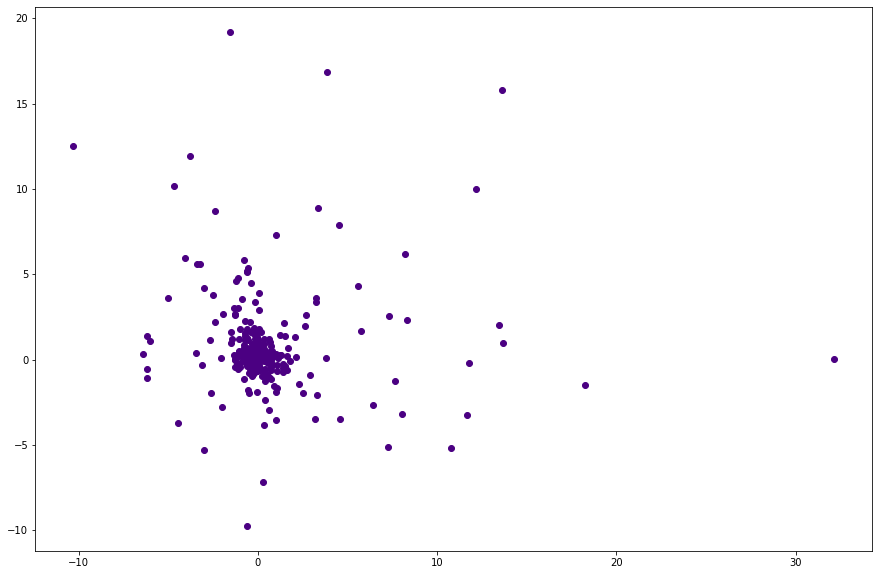

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import random
x = [n[0] for n in lsa_for_graph]
y = [n[1] for n in lsa_for_graph]
plt.figure(figsize = (15, 10)) 
plt.scatter(x, y, color='#4B0082')

In [158]:
all_res = get_matrix(first_result)
lsa_all = lsa_matrix(all_res, 2)


x = [n[0] for n in lsa_all[100:-100]]
y = [n[1] for n in lsa_all[100:-100]]
x_first_100 = [n[0] for n in lsa_all[:100]]
y_first_100 = [n[1] for n in lsa_all[:100]]
x_last_100 = [n[0] for n in lsa_all[-100:]]
y_last_100 = [n[1] for n in lsa_all[-100:]]

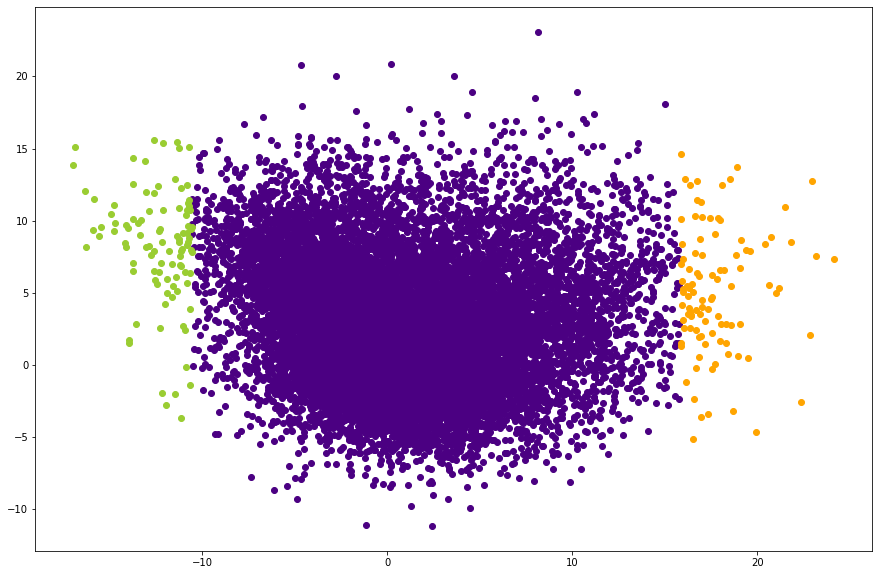

In [159]:
plt.figure(figsize = (15, 10)) 
plt.scatter(x, y, color='#4B0082')
plt.scatter(x_first_100, y_first_100, color='#FFA500')
plt.scatter(x_last_100, y_last_100, color='#9ACD32')

Фиолетовые -- каждое двухсотое слово из отсортированного списка первой итерации, оранжевые -- первые сто слов этого же списка, зелёные -- последние сто слов этого же списка

C:\Users\veron\AppData\Local\Temp/ipykernel_17544/1572608027.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax_3d = Axes3D(fig)


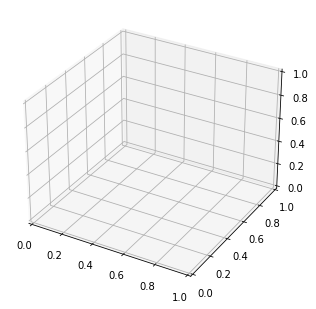

In [123]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 4))
ax_3d = Axes3D(fig)
 
plt.show()

In [132]:
all_res = get_matrix(first_result)
lsa_all = lsa_matrix(all_res, 3)


x = [n[0] for n in first_nums[100:-100]]
y = [n[1] for n in first_nums[100:-100]]
z = [n[2] for n in first_nums[100:-100]]
x_first_100 = [n[0] for n in first_nums[:100]]
y_first_100 = [n[1] for n in first_nums[:100]]
z_first_100 = [n[2] for n in first_nums[:100]]
x_last_100 = [n[0] for n in first_nums[-100:]]
y_last_100 = [n[1] for n in first_nums[-100:]]
z_last_100 = [n[2] for n in first_nums[-100:]]

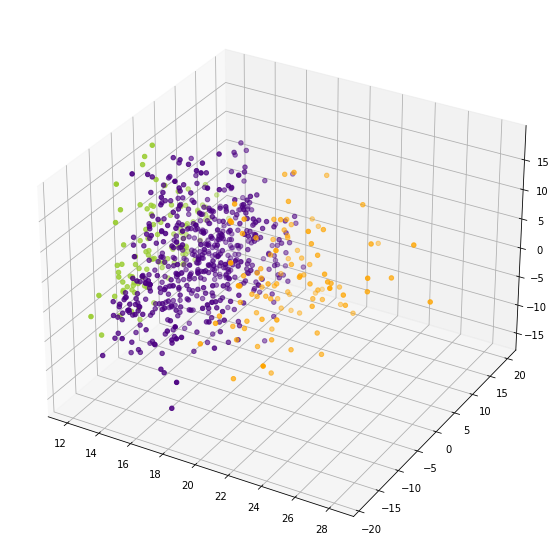

In [134]:
fig = plt.figure(figsize = (15, 10)) 

ax_3d = fig.add_subplot(projection='3d')

ax_3d.scatter(x, y, z, color='#4B0082')
ax_3d.scatter(x_first_100, y_first_100, z_first_100, color='#FFA500')
ax_3d.scatter(x_last_100, y_last_100, z_last_100, color='#9ACD32')